# DESCRICAO DO PROJETO: 
- 1 Abordaremos dados de jogos de video-game de diversas plataformas, com dados que contam de 1980 tratando dos primeiros jogos, até 2016, quando o mundo estava na oitava geração de consoles.  
- 2 trataremos os dados 
  - 2.2 identificando problemas como nome das colunas 
  - 2.3 valores ausentes 
  - 2.4 linhas duplicadas 
  - 2.5 valores suspeito.  
- 3 após, iremos análisar os dados para entender quanto tempo um console sobrevive no mercado, 
  - 3.2 quais o consoles que estavam mais em alta até 2016 e 
  - 3.3 o que se poderia esperar para o ano de 2017.  
- 4 analizaremos também como a regiões diferentes do mundo afetam os generos preferidos dos clientes, bem como 
  - 4.2 se há diferenças substanciais de avaliações dos mesmos jogos de uma plataforma para outra.  
- 5 por fim analizaremos se as avaliações medias dos usuários por jogo sofrem variações significativas, a depender do gênero, ou da plataforma.  
- 6 descreveremos as conclusões finais  

**Importando bibliotecas e carregando arquivos:**

In [2]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib as mt
from math import factorial
import matplotlib.pyplot as plt
from scipy import stats as st


In [3]:
#carregando arquivos
try:
    dfgames= pd.read_csv("/datasets/games.csv") 
    
except:
    dfgames = pd.read_csv("games.csv")


In [4]:
dfgames
dfgcrua=dfgames

In [5]:

dfgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Tratando os Dados**

Muitos valores ausentes, vamos analisar cada coluna. Nomeclatura das colunas deve ficar em minusculo, vamos substituir.

In [5]:
dfgames.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release','Genre':'genre', 'NA_sales':	'na_sales',	'EU_sales':'eu_sales',	'JP_sales':'jp_sales','Other_sales': 'other_sales','Critic_Score':	'critic_score',	'User_Score':'user_score',	'Rating':'rating'}, inplace=True)


alternativamente: dfgames.columns=dfgames.columns.str.lower()

primeiro vamos avaliar a coluna year_of_release

In [6]:
dfgames['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

<AxesSubplot:>

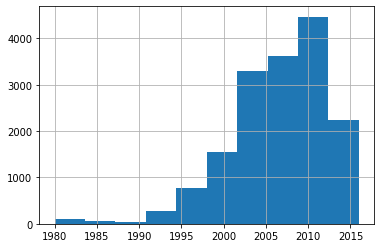

In [7]:
dfgames['year_of_release'].hist()

In [8]:
dfgames[dfgames['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


primeiro verificamos se há valoes duplicados
Então, vamos substituir os valores ausentes da coluna ano de lançamento, para tanto usaremos a mediana por plataforma.
primeiro faremos uma tabela dinamica para conhecermos os valores que substituirão os ausentes. Após, usamos a tabela na função para substituir o valor do parametro, quando Nulo. Em sequencia, usamos um apply para passar como argumento todas as linhas do dataframe e checamos novamente com o metodo info().

In [9]:
duplicadas=dfgames[dfgames.duplicated()]
duplicadas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
dfgames[dfgames['platform']=='2600']['year_of_release'].median()

1982.0

In [11]:
dfanomedia=dfgames.pivot_table(values='year_of_release',columns='platform',aggfunc= 'median')
dfanomedia


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,1982.0,1995.0,2013.0,2000.0,2008.0,1997.0,2003.0,2003.0,1993.0,1992.0,...,1996.0,1994.0,1994.0,1995.0,2000.0,2009.0,2013.0,2010.0,2004.0,2015.0


In [12]:
dfanomedia['GB']

year_of_release    1997.0
Name: GB, dtype: float64

In [13]:
def filln(linha):
    x=linha['year_of_release']
    y=linha['platform']
    if pd.isnull(x):
        return dfanomedia[y]
    return x
dfgames['year_of_release']=dfgames.apply(filln, axis=1) 
dfgames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
dfgames.loc[456]

name                                      LEGO Batman: The Videogame
platform                                                         Wii
year_of_release    year_of_release    2009.0
Name: Wii, dtype: fl...
genre                                                         Action
na_sales                                                         1.8
eu_sales                                                        0.97
jp_sales                                                         0.0
other_sales                                                     0.29
critic_score                                                    74.0
user_score                                                       7.9
rating                                                          E10+
Name: 456, dtype: object

In [15]:
dfgames.loc[609]

name                                                  Space Invaders
platform                                                        2600
year_of_release    year_of_release    1982.0
Name: 2600, dtype: f...
genre                                                        Shooter
na_sales                                                        2.36
eu_sales                                                        0.14
jp_sales                                                         0.0
other_sales                                                     0.03
critic_score                                                     NaN
user_score                                                       NaN
rating                                                           NaN
Name: 609, dtype: object

In [16]:
dfgames[dfgames['platform']=='Wii']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
...,...,...,...,...,...,...,...,...,...,...,...
16589,Bomberman,Wii,2008.0,Puzzle,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16626,The Ultimate Battle of the Sexes,Wii,2010.0,Misc,0.01,0.00,0.00,0.00,NaN,tbd,T
16664,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16685,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [17]:
dfgames.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


In [18]:
dfgcrua.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
name               0.000120
genre              0.000120
platform           0.000000
year_of_release    0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

Percebo que apenas os valores de avaliações e de classificação etária possuem muitos valores ausentes. 
vamos excluir os jogos sem nome, pois são em numero insignificante.

In [19]:
dfgcrua[dfgcrua['name'].isna()]  
dfgames=dfgames.drop([659,14244])
dfgames[dfgames['name'].isna()]  

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No proximo passo, busco converter o tipo de cada coluna para o que considero mais adequado.
Para tanto, nas colunas de avaluações terei que tratar dos valores ausentes e as strings.
Assim, converterei os valores ausentes e os valores suspeitos nas colunas de avaliação dos jogos para o valor 0, pois como se tratam de avaliações, não faz sentido atribuir qualquer valor estimado de média para esses jogos, pois iria afastar muito da realidade e poderia prejudicar a analise de linearidade entre vendas e avaliações.


In [20]:

dfgames['year_of_release']=dfgames['year_of_release'].astype(int)
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [21]:
dfgames['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
dfgames.loc[(dfgames['user_score'] == 'nan') | (dfgames['user_score'] == 'tbd'), 'user_score'] = 0


In [23]:
dfgames['user_score']=dfgames['user_score'].fillna(0)
dfgames['user_score']=dfgames['user_score'].astype(float)
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
dfgames['critic_score'].unique()   
dfgames['critic_score']=dfgames['critic_score'].fillna(0)
dfgames['critic_score']=dfgames['critic_score'].astype(float)


In [25]:
dfgames['rating'].unique()  

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

https://www.esrb.org/ratings-guide/

In [26]:
dfgames['rating']=dfgames['rating'].fillna(0)
dfgames[dfgames['rating']==0].count()

name               6764
platform           6764
year_of_release    6764
genre              6764
na_sales           6764
eu_sales           6764
jp_sales           6764
other_sales        6764
critic_score       6764
user_score         6764
rating             6764
dtype: int64

In [27]:
dfgames[dfgames['rating']==0].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,0
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,0
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,0
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0.0,0.0,0
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,0.0,0.0,0
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0.0,0.0,0
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,0.0,0.0,0
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,0.0,0.0,0


Observei que entre os valores ausente em rating temos jogos que se classificarão como E(tetris), outros como T(007) e outros como M(Call of Duty: Black Ops 3),portanto não seguem um padrão.
Pela quantidade não posso substituir manualmetne um a um, portanto também atribuirei 0 a estes valores ausentes.
no processo de substituir aproveitarei e já passarei os valores coluna para int, substituindo os códigos de idade mínima pelo numero em si, reservando o valor de 1 para everyone e o valor de 0 para os com informação ausente( incluindo aqueles classificados como RP).

In [28]:
 
dfgames['rating']=dfgames['rating'].replace({'E': 1, 'M':17, 'T':13, 'E10+':10, 'K-A':6, 'AO':18, 'EC': 3, 'RP': 0})
dfgames['rating'].unique()
dfgames['rating']=dfgames['rating'].astype(int)


vamos comparar a tabela tratada com a tabela não tratada:

In [29]:
dfgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.5+ MB


In [30]:
dfgcrua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


**Adicionando informações**

agora que tratamos os dados, iremos adicionar colunas de interesse como a soma de todas as vendas de todas as regiões

In [31]:
dfgames['sales']=dfgames['na_sales']+dfgames['eu_sales']+dfgames['jp_sales']+dfgames['other_sales']
dfgames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,0,0.01


O que foi feito:
• Substitui os nomes das colunas (transformar tudo em minúsculos).
• Converti os dados numericos de ano do lançamento, pontos de critica e publico para float, passei o codigo de rating para a idade mínima e o tipo para ou int.
• foi necessário decidir como lidar com valores ausentes:
Usei a media de ano por plataforma para preencher os anos faltantes, e usei o numero 0 para preencher os scores e age rating faltantes usei o 0 porque muitos valores de score estavam zerados, outros ausentes, como não acredito em nota 0 proposital, penso que são ausentes também.  Coloquei as notas a serem determinadas, bem como a classificação a ser determinada no mesmo conjunto de valores zerados, pois independente do motivo de não constarem notas ou classificação, não dá pra trabalhar com os dados.
Por fim, calculei o total de vendas (a soma das vendas em todas as regiões) 
para cada jogo e coloquei esses valores em uma coluna separada.


dfgames['year_of_release'].value_counts()

de 1993 para trás não temos amostras muito significativas, 
o que significa que para fins de estudos, é melhor agrupá-los,
é o que faremos!

In [32]:
def grupoano(linha):
    if linha['year_of_release']> 1993:
        return linha['year_of_release']
    return 1993

dfgames['year']=dfgames.apply(grupoano, axis=1)

agupei todos os jogos lançados antes de 1994 sob o ano de 1993, significando esta data ou anterior


In [33]:
media=dfgames.groupby('platform').mean().sort_values(by='sales')
soma=dfgames.groupby('platform').sum().sort_values(by='sales')
display(media,soma)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
platform,,,,,,,,,,
PCFX,1996.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.030000,1996.000000
3DO,1994.666667,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,1994.666667
GG,1992.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,1993.000000
TG16,1995.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.080000,1995.000000
NG,1994.500000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.120000,1994.500000
PSV,2014.132558,0.029256,0.030512,0.050953,0.015023,19.755814,2.439767,4.062791,0.125744,2014.132558
SAT,1996.028902,0.004162,0.003121,0.186474,0.000405,0.000000,0.000000,0.000000,0.194162,1996.028902
WS,2000.000000,0.000000,0.000000,0.236667,0.000000,0.000000,0.000000,0.000000,0.236667,2000.000000
PSP,2008.735318,0.090298,0.055153,0.063507,0.034260,25.765095,2.517039,3.882548,0.243218,2008.735318


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
platform,,,,,,,,,,
PCFX,1996,0.00,0.00,0.03,0.00,0.0,0.0,0,0.03,1996
GG,1992,0.00,0.00,0.04,0.00,0.0,0.0,0,0.04,1993
3DO,5984,0.00,0.00,0.10,0.00,0.0,0.0,0,0.10,5984
TG16,3990,0.00,0.00,0.16,0.00,0.0,0.0,0,0.16,3990
WS,12000,0.00,0.00,1.42,0.00,0.0,0.0,0,1.42,12000
NG,23934,0.00,0.00,1.44,0.00,0.0,0.0,0,1.44,23934
SCD,11963,1.00,0.36,0.45,0.05,0.0,0.0,0,1.86,11963
DC,103997,5.43,1.69,8.56,0.27,1223.0,119.4,150,15.95,103997
GEN,53812,19.27,5.52,2.67,0.89,0.0,0.0,0,28.35,53823


In [34]:
def top12(linha):
    top_platforms = ['N64', 'Wii', 'PS3', '2600', 'X360', 'PS4', 'SNES', 'GEN', 'NES', 'GB','PS2','DS','PS']
    if linha['platform'] in top_platforms:
        return linha
    return 0

dftop12 = dfgames.apply(top12, axis=1)      

In [35]:
dftop12 = dftop12[dftop12['platform'] != 0]
top12_pivot=dftop12.pivot_table(index= 'year_of_release', values= 'sales', columns= 'platform', aggfunc= 'mean' )  
top12_pivots=dftop12.pivot_table(index= 'year_of_release', values= 'sales', columns= 'platform', aggfunc= 'sum' )  

display(top12_pivot, top12_pivots)


platform,2600,DS,GB,GEN,N64,NES,PS,PS2,PS3,PS4,SNES,Wii,X360
year_of_release,,,,,,,,,,,,,
1980,1.264444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,0.775652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,0.743019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,0.530909,NaN,NaN,NaN,NaN,1.826667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.270000,NaN,NaN,NaN,NaN,3.852308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.450000,0.020000,NaN,NaN,NaN,4.858182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.335000,NaN,NaN,NaN,NaN,1.916316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,0.323333,NaN,NaN,NaN,NaN,1.976000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.370000,NaN,1.430000,NaN,NaN,4.091818,NaN,NaN,NaN,NaN,NaN,NaN,NaN


platform,2600,DS,GB,GEN,N64,NES,PS,PS2,PS3,PS4,SNES,Wii,X360
year_of_release,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,0.02,NaN,NaN,NaN,53.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,1.43,NaN,NaN,45.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'GB'}, xlabel='year_of_release', ylabel='bilhões'>

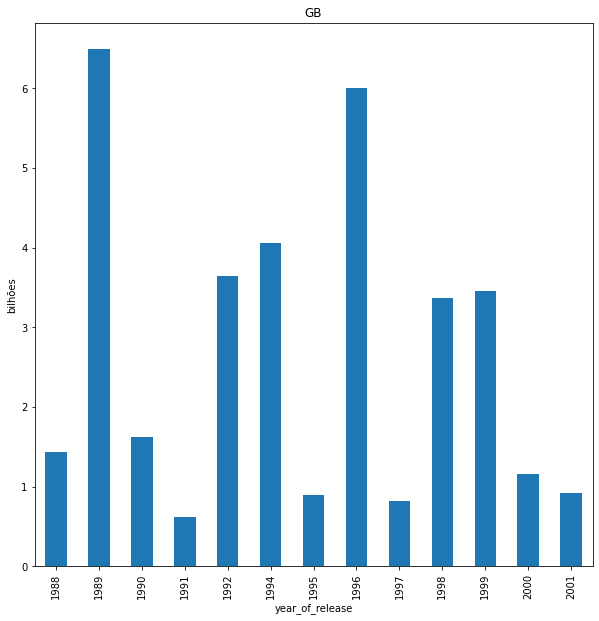

In [36]:
gameboydf=dfgames[dfgames['platform']=='GB'].groupby('year_of_release').mean()
gameboydfs=dfgames[dfgames['platform']=='GB'].groupby('year_of_release').sum()
gameboydf['sales'].plot(kind='bar', title='GB', figsize=[10,10], ylabel='bilhões')

<AxesSubplot:title={'center':'GB'}, xlabel='year_of_release', ylabel='bilhões'>

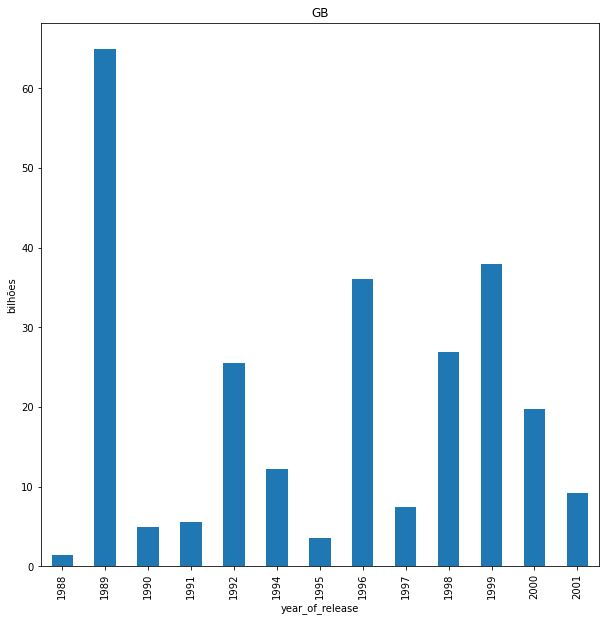

In [37]:
gameboydfs['sales'].plot(kind='bar', title='GB', figsize=[10,10], ylabel='bilhões')


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
year_of_release,,,,,,,,,
1983,0.386667,0.076667,1.350000,0.013333,0.0,0.0,0,1.826667,1993
1984,2.540000,0.160769,1.097692,0.053846,0.0,0.0,0,3.852308,1993
1985,3.028182,0.425455,1.321818,0.082727,0.0,0.0,0,4.858182,1993
1986,0.624737,0.147368,1.042632,0.101579,0.0,0.0,0,1.916316,1993
1987,0.662000,0.132000,1.163000,0.019000,0.0,0.0,0,1.976000,1993
1988,2.032727,0.572727,1.400909,0.085455,0.0,0.0,0,4.091818,1993
1989,0.950000,0.162000,0.440000,0.018000,0.0,0.0,0,1.570000,1993
1990,0.760000,0.198750,0.980000,0.027500,0.0,0.0,0,1.966250,1993
1991,0.404286,0.074286,0.371429,0.022857,0.0,0.0,0,0.872857,1993


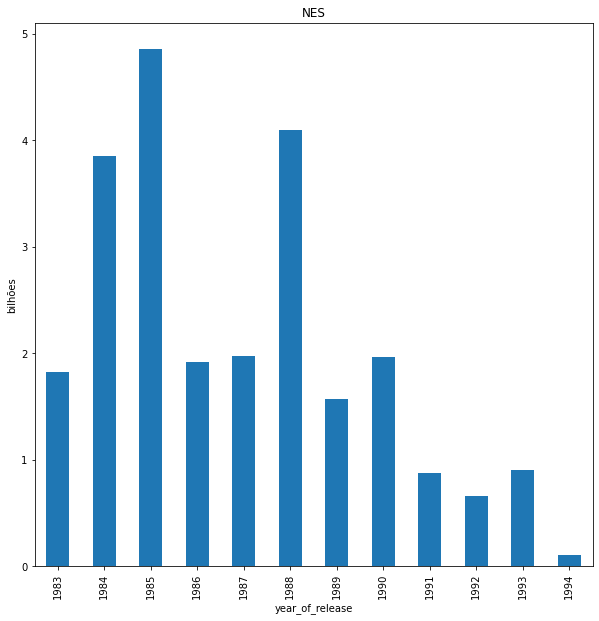

In [38]:
nesdf=dfgames[dfgames['platform']=='NES'].groupby('year_of_release').mean()
nesdf['sales'].plot(kind='bar', title='NES', figsize=[10,10],ylabel='bilhões')
nesdf

<AxesSubplot:title={'center':'GEN'}, xlabel='year_of_release', ylabel='bilhões'>

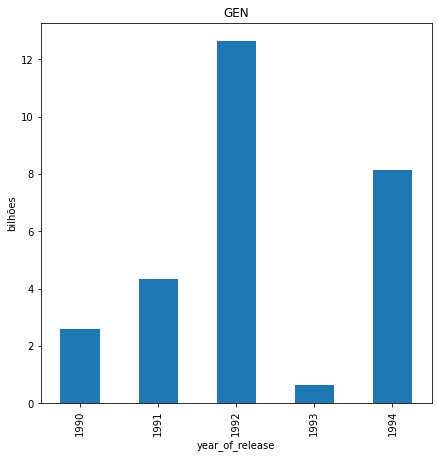

In [39]:
gendfs=dfgames[dfgames['platform']=='GEN'].groupby('year_of_release').sum()
gendfs['sales'].plot(kind='bar', title='GEN', figsize=[7,7],ylabel='bilhões')

<AxesSubplot:title={'center':'GEN'}, xlabel='year_of_release', ylabel='bilhões'>

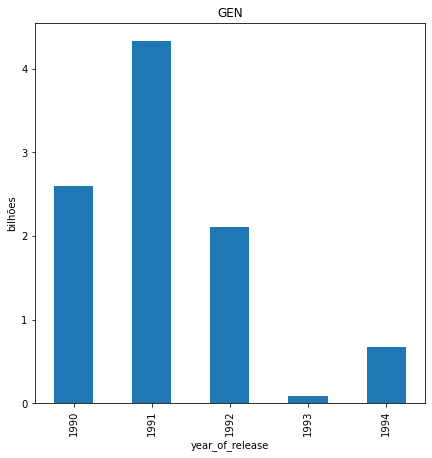

In [40]:
gendf=dfgames[dfgames['platform']=='GEN'].groupby('year_of_release').mean()
gendf['sales'].plot(kind='bar', title='GEN', figsize=[7,7],ylabel='bilhões')

<AxesSubplot:title={'center':'SNES media de venda'}, xlabel='year_of_release', ylabel='bilhões'>

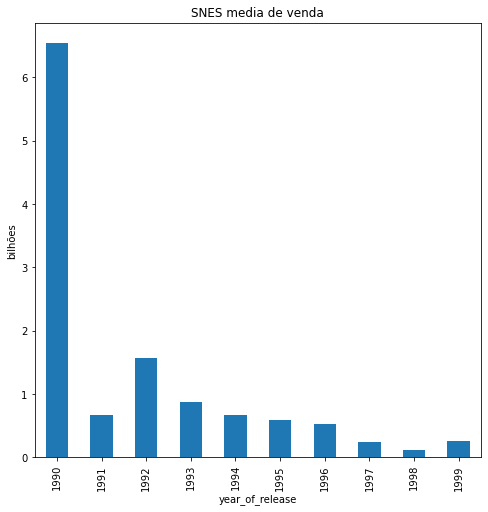

In [41]:
SNESdf=dfgames[dfgames['platform']=='SNES'].groupby('year_of_release').mean()
SNESdfs=dfgames[dfgames['platform']=='SNES'].groupby('year_of_release').sum()
SNESdf['sales'].plot(kind='bar', title='SNES media de venda', figsize=[8,8],ylabel='bilhões')

<AxesSubplot:title={'center':'SNES soma'}, xlabel='year_of_release', ylabel='bilhões'>

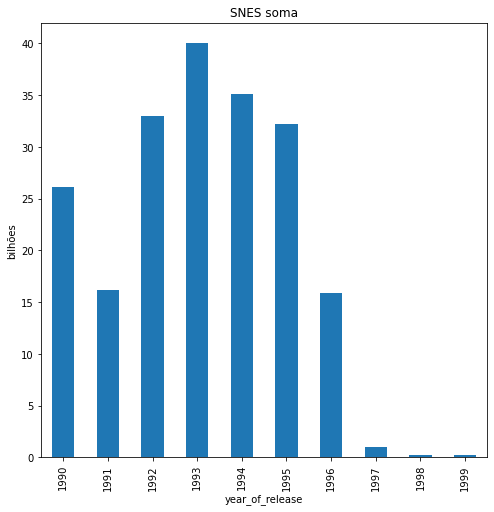

In [42]:
SNESdfs['sales'].plot(kind='bar', title='SNES soma', figsize=[8,8],ylabel='bilhões')

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release', ylabel='bilhões'>

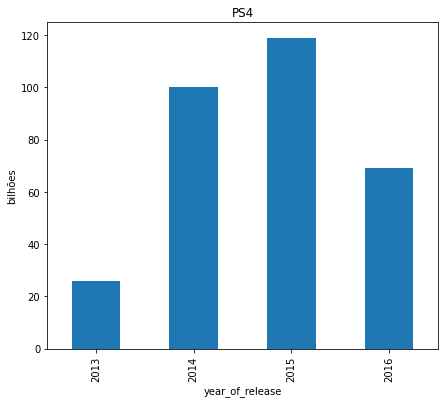

In [43]:
PS4dfs=dfgames[dfgames['platform']=='PS4'].groupby('year_of_release').sum()
PS4dfs['sales'].plot(kind='bar', title='PS4', figsize=[7,6],ylabel='bilhões')


,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
year_of_release,,,,,,,,,
2013,0.633125,0.690625,0.058750,0.241875,66.500000,5.118750,8.312500,1.624375,2013.0
2014,0.463333,0.620000,0.039600,0.210400,50.706667,4.673333,7.866667,1.333333,2014.0
2015,0.309270,0.377810,0.046058,0.134745,45.810219,4.435036,6.927007,0.867883,2015.0
2016,0.131037,0.193780,0.035000,0.062439,42.829268,4.233537,7.189024,0.422256,2016.0


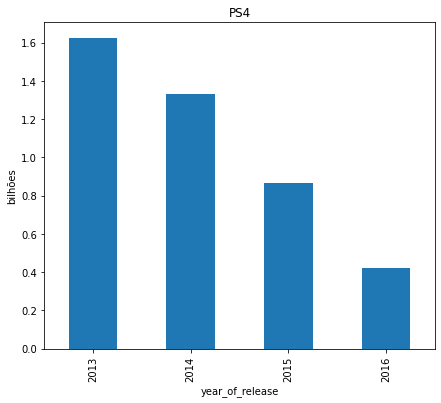

In [44]:
PS4df=dfgames[dfgames['platform']=='PS4'].groupby('year_of_release').mean()
PS4df['sales'].plot(kind='bar', title='PS4', figsize=[7,6],ylabel='bilhões')
PS4df

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
year,,,,,,,,,
2005,2005.0,0.383333,0.023889,0.015556,0.035556,68.166667,6.538889,8.944444,0.458333
2006,2006.0,0.378065,0.116559,0.012903,0.047527,57.075269,5.707527,9.086022,0.555054
2007,2007.0,0.512114,0.180244,0.012358,0.070976,61.813008,5.943902,9.170732,0.775691
2008,2008.0,0.565137,0.261370,0.012945,0.086986,58.931507,5.887671,9.534247,0.926438
2009,2009.0,0.430233,0.193663,0.011337,0.064128,52.651163,5.192442,9.627907,0.699360
2010,2010.0,0.538255,0.229953,0.010566,0.071274,48.985849,4.808019,8.528302,0.850047
2011,2011.0,0.421117,0.206699,0.008641,0.061796,41.509709,4.091262,7.810680,0.698252
2012,2012.0,0.550849,0.301887,0.010000,0.078208,61.424528,5.706604,10.924528,0.940943
2013,2013.0,0.711467,0.360400,0.005733,0.103467,52.680000,5.040000,9.573333,1.181067


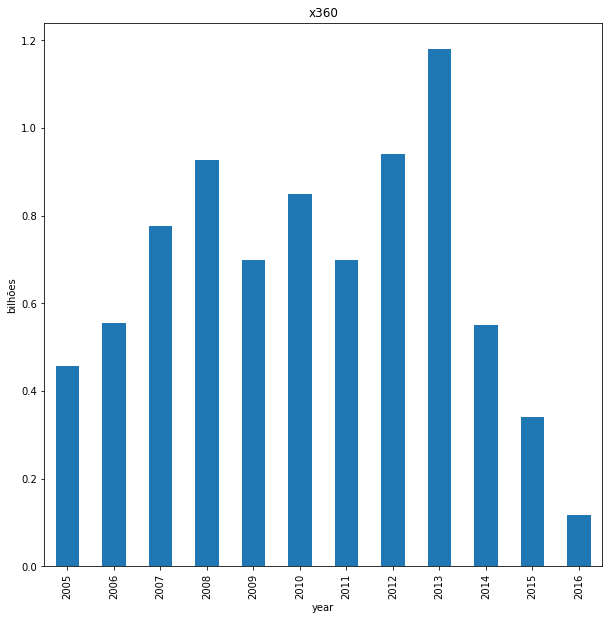

In [45]:
X360df=dfgames[dfgames['platform']=='X360'].groupby('year').mean()
X360df['sales'].plot(kind='bar', title='x360', figsize=[10,10],ylabel='bilhões')

X360df

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
year_of_release,,,,,,,,,
1980,1.176667,0.074444,0.0,0.013333,0.0,0.0,0,1.264444,1993
1981,0.726087,0.042609,0.0,0.006957,0.0,0.0,0,0.775652,1993
1982,0.693208,0.042642,0.0,0.007170,0.0,0.0,0,0.743019,1993
1983,0.494545,0.030909,0.0,0.005455,0.0,0.0,0,0.530909,1993
1984,0.260000,0.010000,0.0,0.000000,0.0,0.0,0,0.270000,1993
1985,0.420000,0.030000,0.0,0.000000,0.0,0.0,0,0.450000,1993
1986,0.315000,0.020000,0.0,0.000000,0.0,0.0,0,0.335000,1993
1987,0.306667,0.015000,0.0,0.001667,0.0,0.0,0,0.323333,1993
1988,0.345000,0.020000,0.0,0.005000,0.0,0.0,0,0.370000,1993


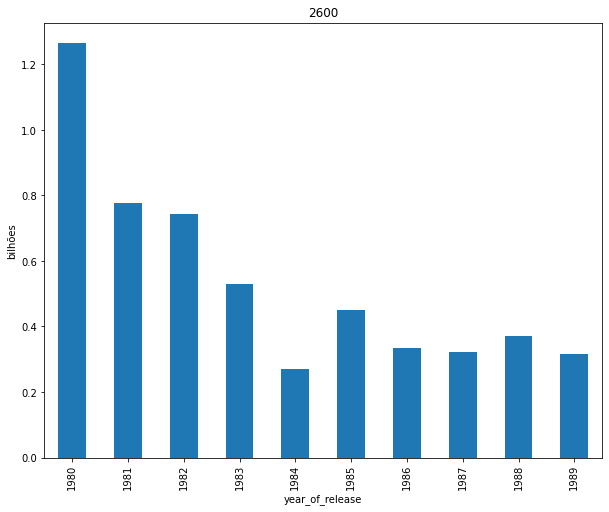

In [46]:
df2600=dfgames[dfgames['platform']=='2600'].groupby('year_of_release').mean()
df2600['sales'].plot(kind='bar', title='2600', figsize=[10,8],ylabel='bilhões')
df2600

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
year,,,,,,,,,
2006,2006.0,0.327407,0.273333,0.040000,0.135556,52.111111,4.722222,7.222222,0.776296
2007,2007.0,0.357333,0.290000,0.046889,0.119000,63.077778,5.776667,8.555556,0.813222
2008,2008.0,0.414710,0.280652,0.042174,0.121304,57.347826,5.463768,9.108696,0.858841
2009,2009.0,0.386728,0.255556,0.055741,0.110185,51.438272,4.978395,8.629630,0.808210
2010,2010.0,0.336961,0.279006,0.054530,0.114972,46.994475,4.531492,8.088398,0.785470
2011,2011.0,0.284333,0.247167,0.062000,0.094375,44.008333,4.259583,8.170833,0.687875
2012,2012.0,0.269459,0.263851,0.080676,0.111419,46.087838,4.513514,8.101351,0.725405
2013,2013.0,0.328968,0.335476,0.096270,0.138095,48.396825,4.693651,8.333333,0.898810
2014,2014.0,0.151759,0.168889,0.057870,0.063704,21.601852,3.658333,6.750000,0.442222


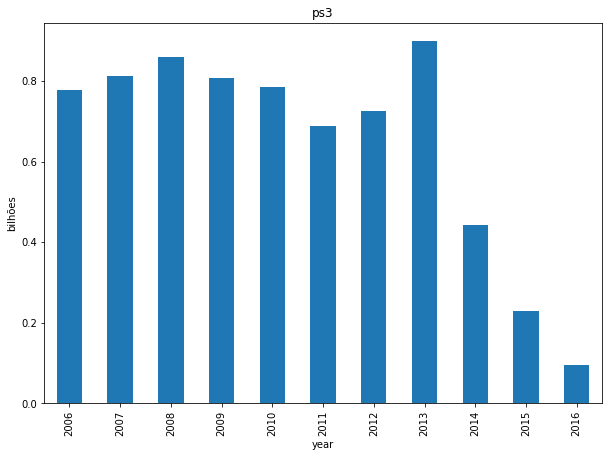

In [47]:
PS3df=dfgames[dfgames['platform']=='PS3'].groupby('year').mean()
PS3df['sales'].plot(kind='bar', title='ps3', figsize=[10,7],ylabel='bilhões')
PS3df

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
year,,,,,,,,,
2006,2006.0,1.610455,0.991364,0.207955,0.307273,48.636364,5.081818,5.954545,3.117045
2007,2007.0,0.449405,0.237622,0.065514,0.073243,39.151351,4.348108,5.227027,0.825784
2008,2008.0,0.344397,0.164965,0.045000,0.053156,30.709220,3.449291,4.730496,0.607518
2009,2009.0,0.347019,0.173259,0.049081,0.052646,29.094708,2.615599,4.838440,0.622006
2010,2010.0,0.287115,0.143518,0.034704,0.040395,19.841897,1.745850,4.434783,0.505731
2011,2011.0,0.217552,0.123636,0.039021,0.036923,20.020979,2.035664,5.321678,0.417133
2012,2012.0,0.351290,0.193226,0.107742,0.048065,12.290323,2.148387,2.903226,0.700323
2013,2013.0,0.373333,0.278333,0.004167,0.060000,0.000000,2.008333,4.083333,0.715833
2014,2014.0,0.265000,0.310000,0.000000,0.050000,0.000000,2.116667,5.333333,0.625000


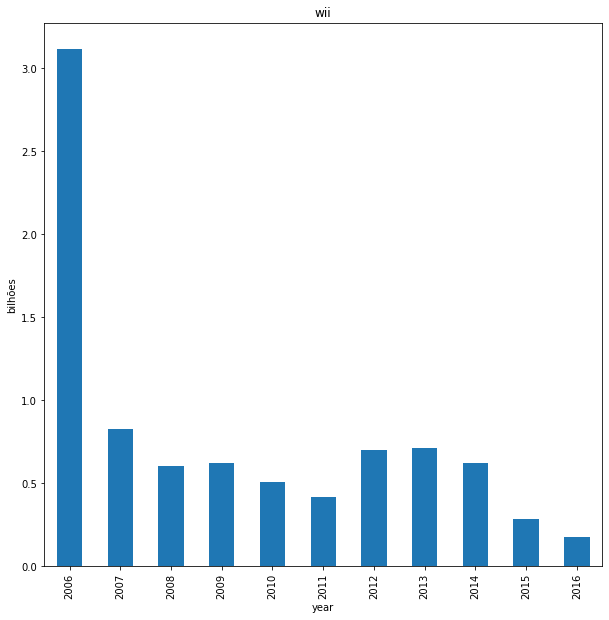

In [48]:
Wiidf=dfgames[dfgames['platform']=='Wii'].groupby('year').mean()
Wiidf['sales'].plot(kind='bar', title='wii', figsize=[10,10],ylabel='bilhões')
Wiidf

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
year,,,,,,,,,
1996,1996,1.168333,0.373333,0.320556,0.032222,0.0,0.0,0,1.894444
1997,1997,0.527347,0.165102,0.095102,0.018571,0.0,0.0,0,0.806122
1998,1998,0.407662,0.134416,0.084935,0.012468,0.0,0.0,0,0.639481
1999,1999,0.370286,0.093048,0.085714,0.008476,0.0,0.0,0,0.557524
2000,2000,0.329000,0.093167,0.128667,0.015333,0.0,0.0,0,0.566167
2001,2001,0.231111,0.057778,0.058889,0.013333,0.0,0.0,0,0.361111
2002,2002,0.060000,0.020000,0.000000,0.000000,0.0,0.0,0,0.080000


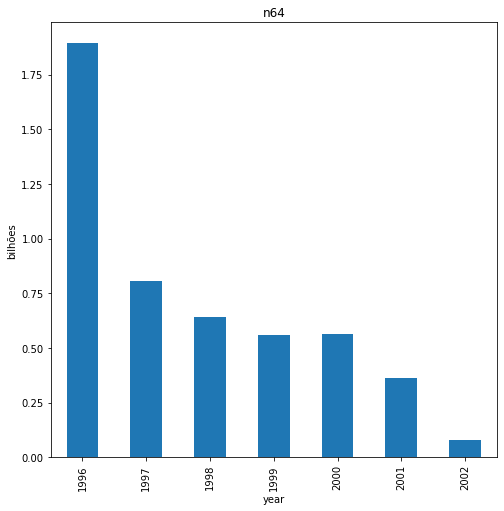

In [49]:
gameboydf=dfgames[dfgames['platform']=='N64'].groupby('year').mean()
gameboydf['sales'].plot(kind='bar', title='n64', figsize=[8,8],ylabel='bilhões')
gameboydf

<AxesSubplot:xlabel='year_of_release'>

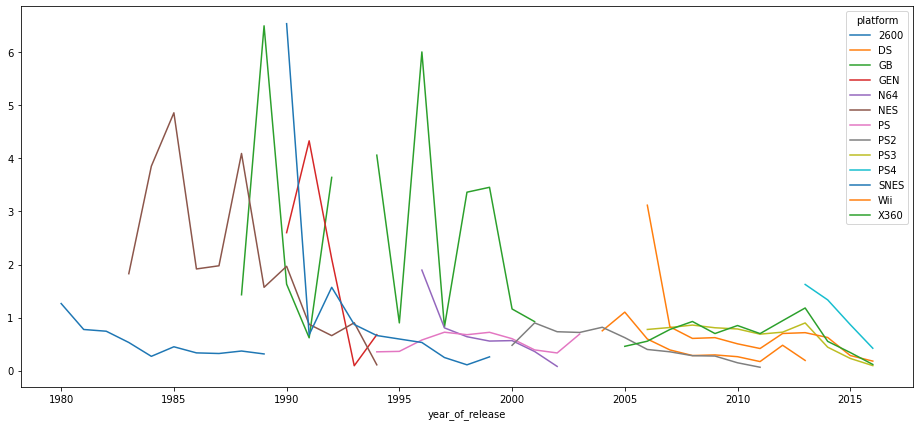

In [50]:

top12_pivot.plot(figsize=[16, 7])

<AxesSubplot:xlabel='year_of_release'>

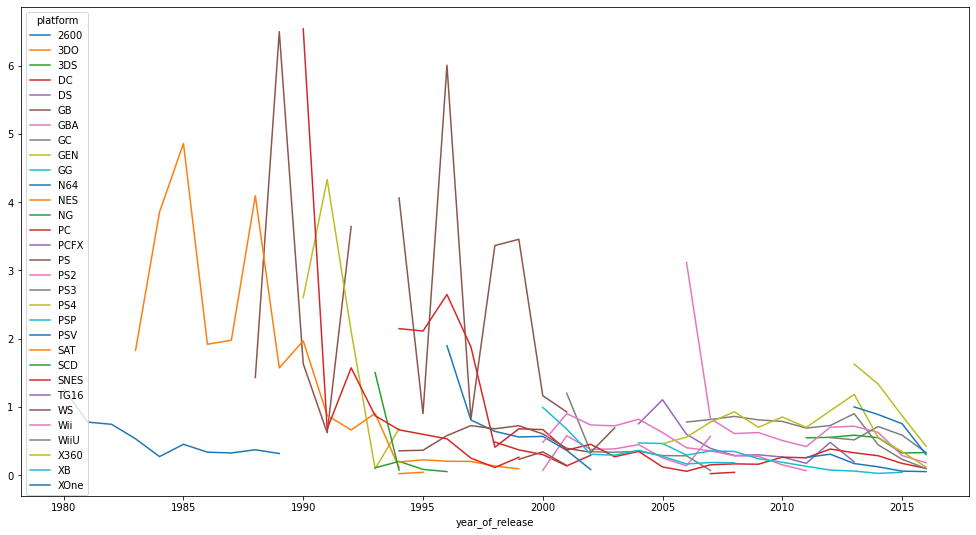

In [51]:
teste=dfgames.pivot_table(index= 'year_of_release', values= 'sales', columns= 'platform', aggfunc= 'mean' )  
teste.plot(figsize=[17, 9])

perceptivel que muitas plataformas se seguram no mercado por  pouco mais de 10 anos, entretanto algumas outras tem um tempo mais curto como o Nintendo 64 que durou apenas 5 anos.

onlygb=dfgames[dfgames['platform']=='GB'].reset_index()
display(onlygb)
plt.scatter(onlygb['year_of_release'],onlygb['sales'])

In [52]:
dfgames.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sales', 'year'],
      dtype='object')

In [53]:
dfgames['year_of_release'].value_counts()/len(dfgames)


2009    0.088314
2008    0.087178
2010    0.077903
2007    0.071621
2011    0.069467
2006    0.060193
2005    0.058218
2002    0.049602
2003    0.047867
2004    0.046850
2012    0.039071
2015    0.036259
2014    0.034823
2013    0.033028
2016    0.030036
2001    0.028840
1998    0.023096
2000    0.020942
1999    0.020403
1997    0.017352
1996    0.015736
1995    0.013104
1994    0.007240
1993    0.003590
1982    0.003171
1981    0.002752
1992    0.002573
1991    0.002453
1986    0.001257
1983    0.001017
1989    0.001017
1990    0.000957
1987    0.000957
1988    0.000898
1985    0.000838
1984    0.000838
1980    0.000539
Name: year_of_release, dtype: float64

vamos fatiar sucessivamente a tabela a partir 1998 em diante para entendermos melhor quem lidera as vendas hoje em dia e o porquê.

In [54]:
dffill=dfgames[dfgames['year_of_release']>=1998]
dffill['year_of_release'].value_counts()
dfmoderno=dffill.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'mean' )
dfmoderno

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1998,NaN,0.482857,NaN,3.362500,NaN,NaN,0.639481,0.407500,0.677529,NaN,...,NaN,NaN,0.131724,0.11,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,0.368571,NaN,3.454545,NaN,NaN,0.557524,0.677143,0.722650,NaN,...,NaN,NaN,0.090000,0.26,0.23,NaN,NaN,NaN,NaN,NaN
2000,NaN,0.299500,NaN,1.162353,0.070000,NaN,0.566167,0.665714,0.602312,0.477683,...,NaN,NaN,NaN,NaN,0.34,NaN,NaN,NaN,0.990000,NaN
2001,NaN,0.133750,NaN,0.924000,0.575047,1.197273,0.361111,0.364667,0.391099,0.899622,...,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,0.674545,NaN
2002,NaN,0.290000,NaN,NaN,0.374545,0.340855,0.080000,0.451053,0.333500,0.733500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.303861,NaN
2003,NaN,NaN,NaN,NaN,0.382857,0.334241,NaN,0.267879,0.690000,0.719961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291217,NaN
2004,NaN,NaN,0.750870,NaN,0.445200,0.347229,NaN,0.346333,NaN,0.817799,...,0.470667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361566,NaN
2005,NaN,NaN,1.102881,NaN,0.250815,0.284742,NaN,0.118108,NaN,0.622007,...,0.461474,NaN,NaN,NaN,NaN,NaN,NaN,0.458333,0.274190,NaN
2006,NaN,NaN,0.596070,NaN,0.135385,0.281500,NaN,0.054808,NaN,0.399305,...,0.292698,NaN,NaN,NaN,NaN,3.117045,NaN,0.555054,0.161935,NaN


<AxesSubplot:title={'center':'media'}, xlabel='year_of_release'>

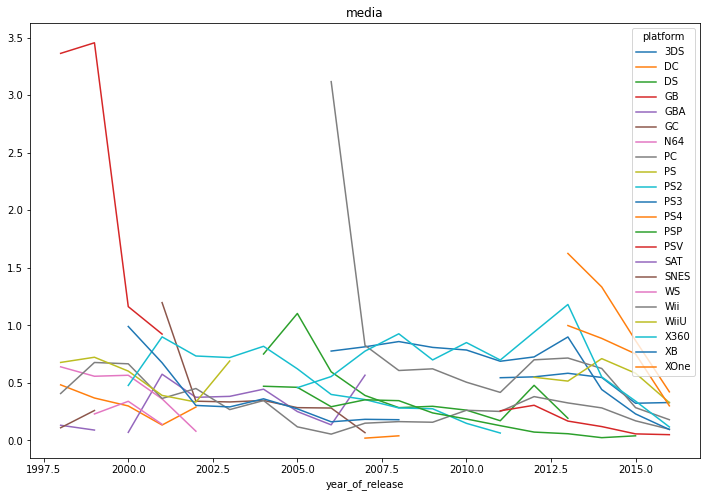

In [55]:
dfmoderno.plot(figsize=[12,8], title='media')

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,...,PSP,PSV,SAT,SNES,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1998,NaN,3.38,NaN,26.90,NaN,NaN,49.24,3.26,172.77,NaN,...,NaN,NaN,3.82,0.22,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,5.16,NaN,38.00,NaN,NaN,58.54,4.74,144.53,NaN,...,NaN,NaN,0.09,0.26,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,5.99,NaN,19.76,0.07,NaN,33.97,4.66,96.37,39.17,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,1.07,NaN,9.24,61.53,26.34,3.25,5.47,35.59,166.43,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,0.29,NaN,NaN,74.16,51.81,0.08,8.57,6.67,205.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003,NaN,NaN,NaN,NaN,61.64,52.81,NaN,8.84,2.07,184.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004,NaN,NaN,17.27,NaN,77.91,28.82,NaN,10.39,NaN,211.81,...,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.59,NaN
2005,NaN,NaN,130.14,NaN,33.86,27.62,NaN,4.37,NaN,182.87,...,43.84,NaN,NaN,NaN,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,NaN,5.28,11.26,NaN,2.85,NaN,103.42,...,55.32,NaN,NaN,NaN,NaN,137.15,NaN,51.62,10.04,NaN


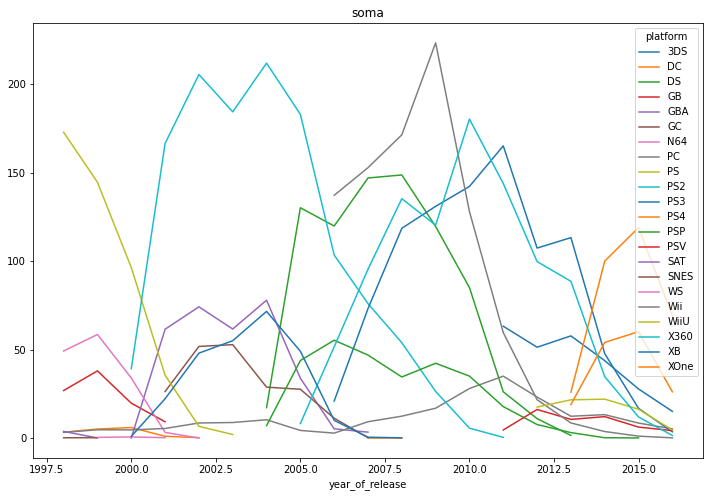

In [56]:
dfsoma=dffill.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'sum' )
dfsoma.plot(figsize=[12,8], title='soma')
dfsoma

In [57]:
dff2005=dfgames[dfgames['year_of_release']>=2005]
df2005=dff2005.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'mean' )
df2005s=dff2005.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'sum' )

<AxesSubplot:title={'center':'soma'}, xlabel='year_of_release'>

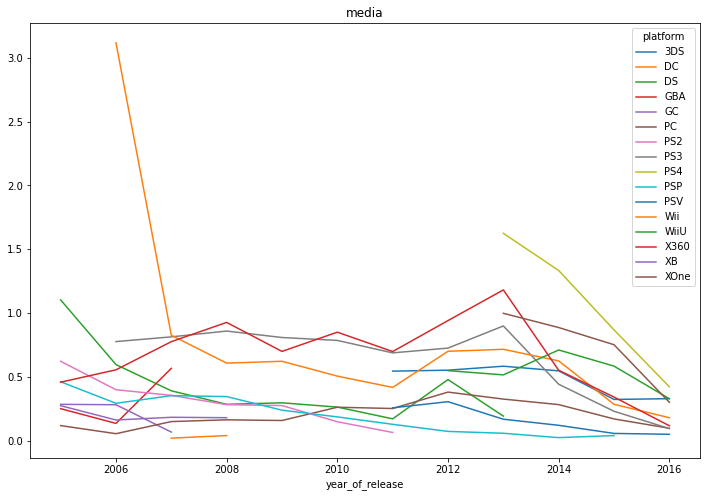

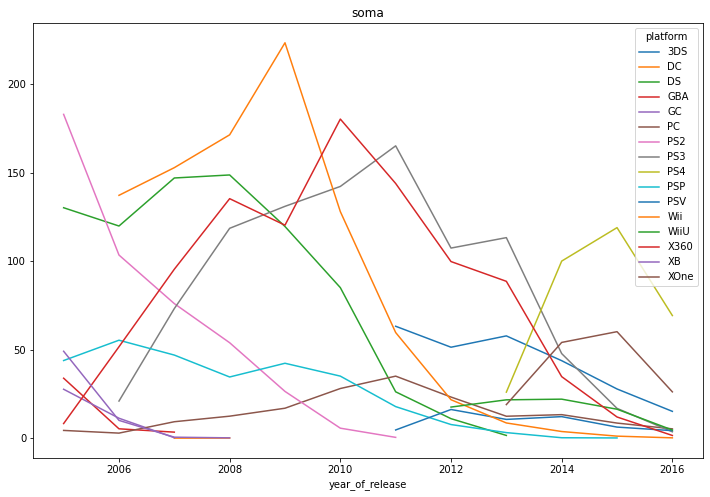

In [58]:
df2005.plot(figsize=[12,8],title='media')
df2005s.plot(figsize=[12,8],title='soma')

<AxesSubplot:title={'center':'soma de vendas por ano'}, xlabel='year_of_release'>

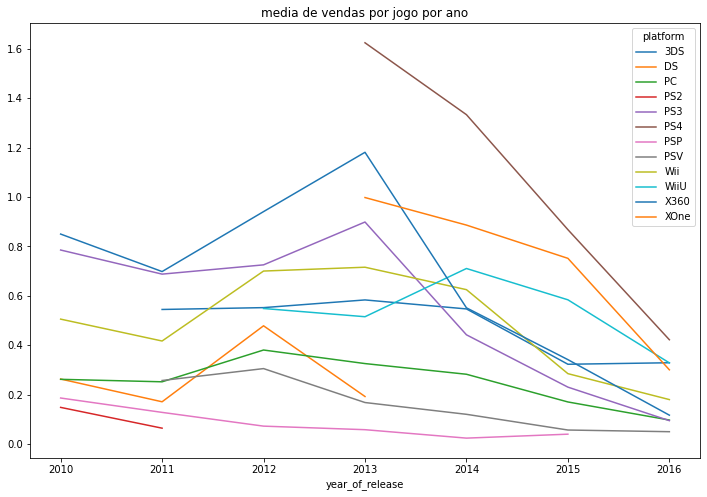

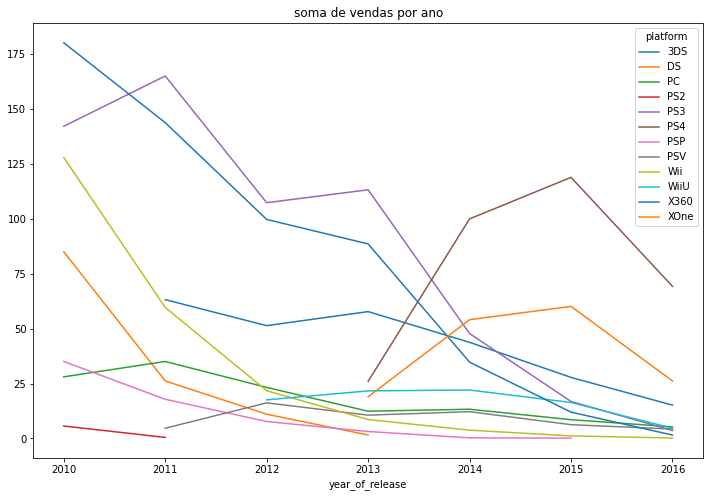

In [59]:
dff2010=dfgames[dfgames['year_of_release']>=2010]
df2010=dff2010.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'mean' )
df2010.plot(figsize=[12,8], title='media de vendas por jogo por ano')
df2010s=dff2010.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'sum' )
df2010s.plot(figsize=[12,8],title= 'soma de vendas por ano')

<AxesSubplot:title={'center':'soma de vendas por ano'}, xlabel='year_of_release'>

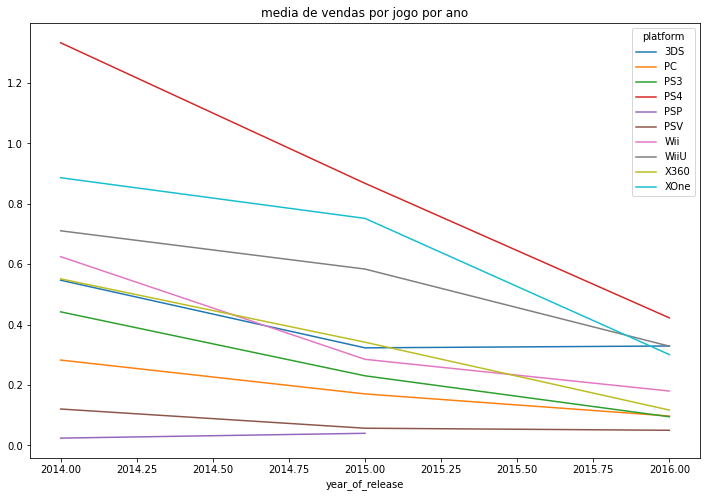

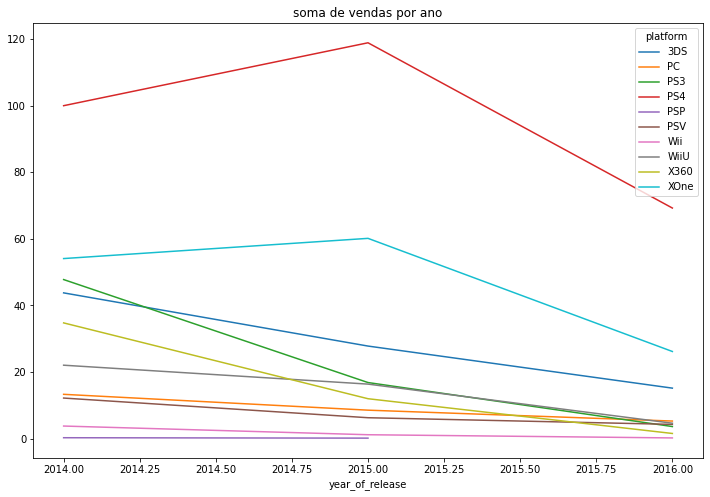

In [60]:
dff2014=dfgames[dfgames['year_of_release']>=2014]
df2014=dff2014.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'mean' )
df2014soma=dff2014.pivot_table(index='year_of_release',columns='platform',values='sales', aggfunc= 'sum' )

df2014.plot(figsize=[12,8], title='media de vendas por jogo por ano')
df2014soma.plot(figsize=[12,8], title= 'soma de vendas por ano')


Muitas plataformas conseguem muitas vendas em seu lançamento ou um ano depois, destacam-se os inovadores, como foi com o wii, GameBoy, Nintendo DS e playstation1. Já o WiiU aparentemente não agradou muito no lançamento e, apesar de singela alta, já está em queda acentuada.





analizando os dados mais atuais 2014-2016, cujos valores considero mais relevantes à previsão de 2017, obtive as seguintes conclusões:

Primeiramente, pela tendencia do grafico e considerando que os valores mais recentes são de 2016,
entendo que nem todos os jogos lançados em 2016 estão na tabela,
tampouco o valor corresponde a toda a venda alcançada naquele ano, por este motivo, é necessário considerar 2016 como ano com dados incompletos, portanto apresenta valores mais baixos.

A média de vendas por jogo das plataformas estão, em geral, em queda, com exceção do portatil 3DS.
Da mesma forma ocorre com a média de vendas totais por ano, com exceção das plataformas de PS4 e XBox One.
Essas duas plataformas apresentam excelentes numeros e espera-se que sejam as mais vendidas em 2017.

Entretanto as plataformas 3DS, PSP, WiiU e PC  apresentam ainda algum potencial para 2017, com destaque para o 3DS, que mesmo em 2016 tem uma boa media de vendas por jogo.
PS3, Xbox360 e Wii apresentam grande queda de vendas, certamente porque foram superados pela plataforma sucessora de cada empresa(sony, microsoft e nintendo),além disso, já estão muito proximas do tempo útil de 10 anos.


O PS4 apesar de ser o lider de vendas, aparentemente sofre grande queda na média de vendas por jogo, desde 2015, entretanto na média por ano ainda é alta e promete bastante para o final de 2016 e para o ano de 2017, assim como a do Xboxone.

dff2014.sort_values(by='sales', ascending=False)

<AxesSubplot:title={'center':'sales'}, xlabel='platform'>

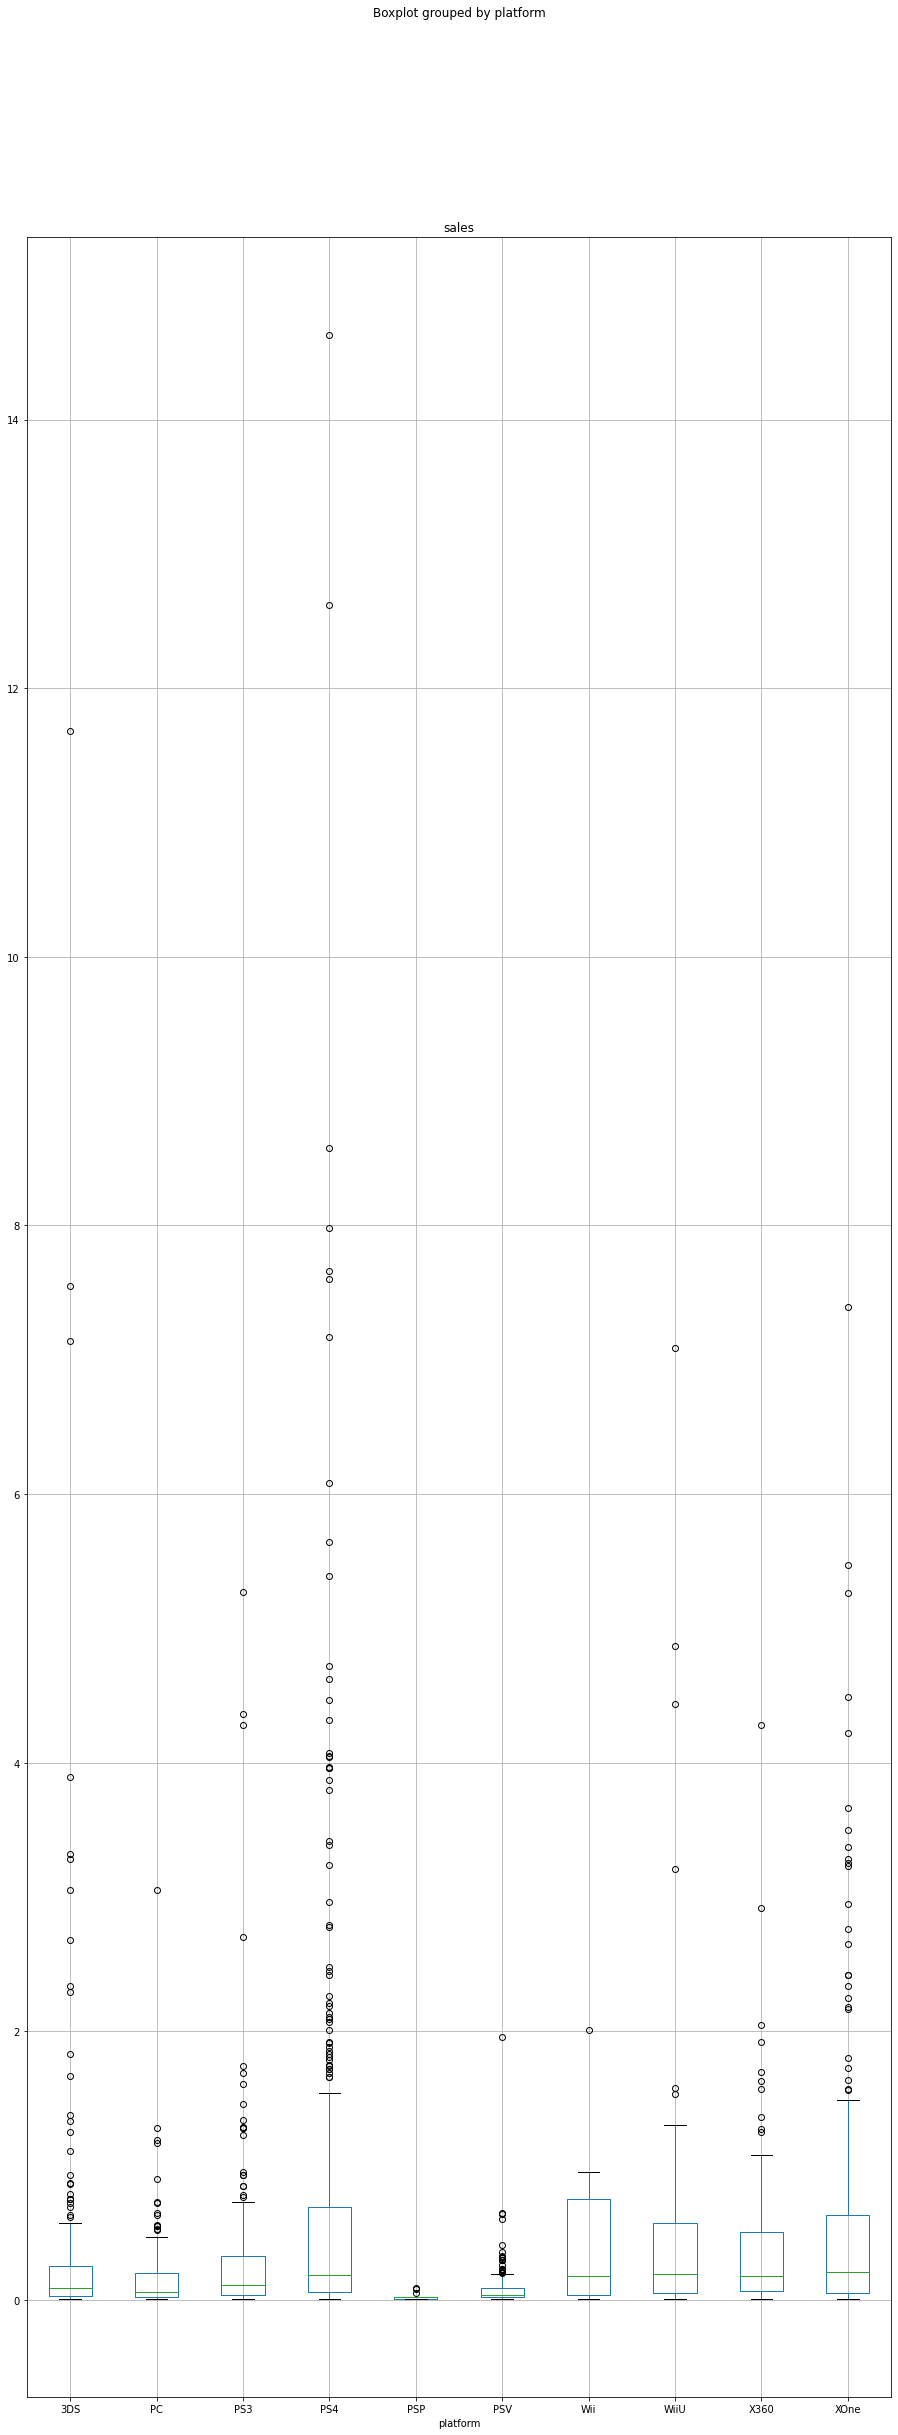

In [61]:
dff2014.boxplot(column= 'sales', by ='platform', figsize=[15,40])

<AxesSubplot:title={'center':'sales'}, xlabel='platform'>

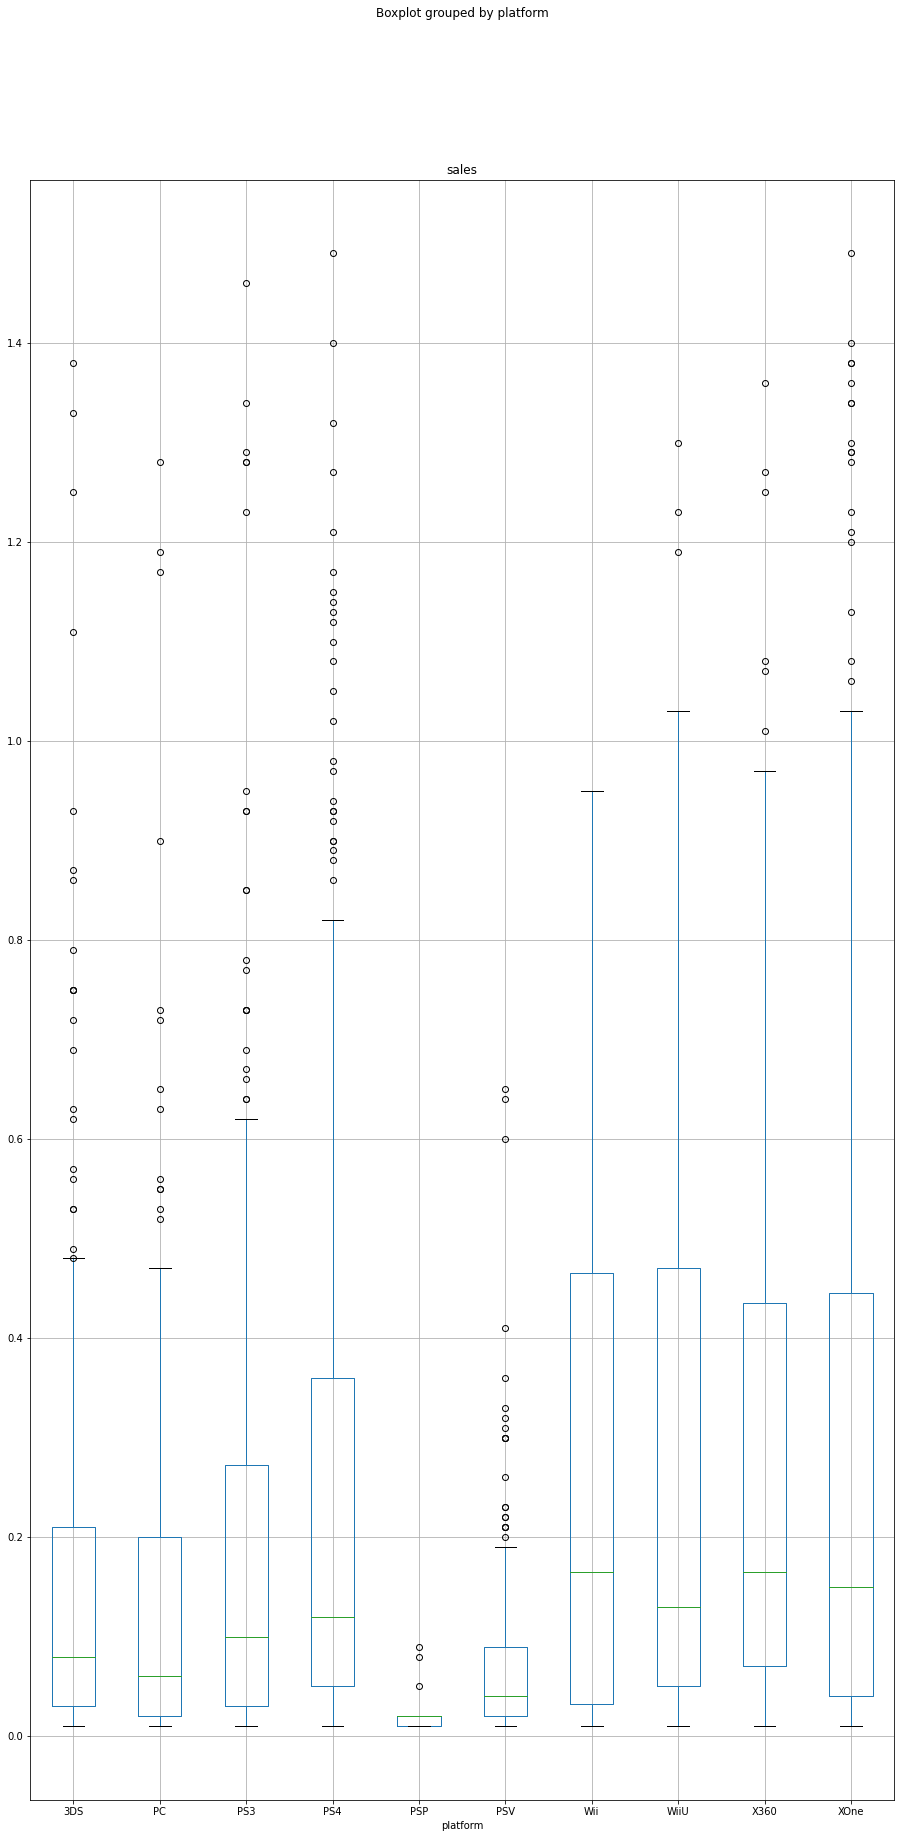

In [62]:
dfbox2014 = dff2014[dff2014['sales']<1.5].sort_values(by='sales')
dfbox2014.boxplot(column= 'sales', by ='platform', figsize=[15,30])

<AxesSubplot:title={'center':'sales'}, xlabel='platform'>

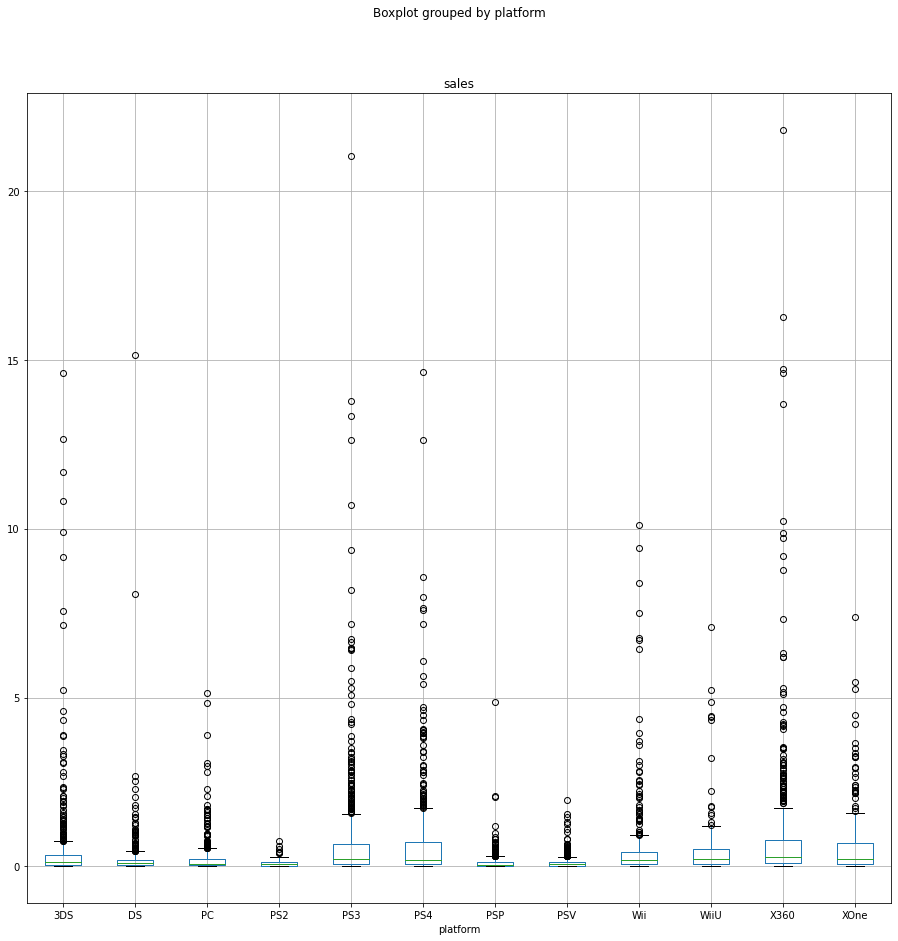

In [63]:
dff2010.boxplot(column= 'sales', by ='platform', figsize=[15,15])

a tendencia é que alguns jogos vendam muito bem, enquanto que a maioria tenha uma média de vendas bem mais baixa. 
Suspeito que lucro maior de cada plataforma é em razão de alguns poucos jogos.
nos ultimos anos, as plataformas PS4, Wii, WiiU e Xbox360, Xboxone, possuem as melhores média de vendas por jogos, sendo até bem parecidos entre si.
Quando eliminamos os jogos com vendas extravagantes, a média se altera muito.
Visivelmente a média PS4 é muito puxada em razão dos jogos chaves.


Vejamos o que nos dizem a critica especializada e a do publico quanto as vendas dos jogos.
Para tanto, usarei apenas os dados de 2010, pois são mais recentes, relevantes às plataformas analizadas e também mais volumosos.

<AxesSubplot:xlabel='user_score', ylabel='sales'>

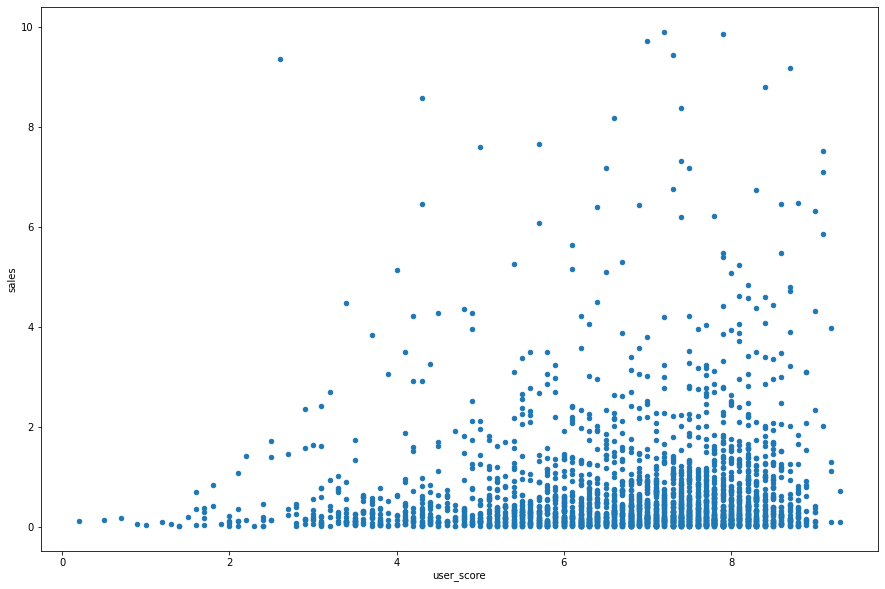

In [64]:
dfuscore=dff2010[dff2010['user_score']!=0]
dfuscore=dfuscore[dfuscore['sales']<10]
dfuscore.plot.scatter(x='user_score', y='sales', figsize=[15,10])

In [65]:
dfgames.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'sales', 'year'],
      dtype='object')

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

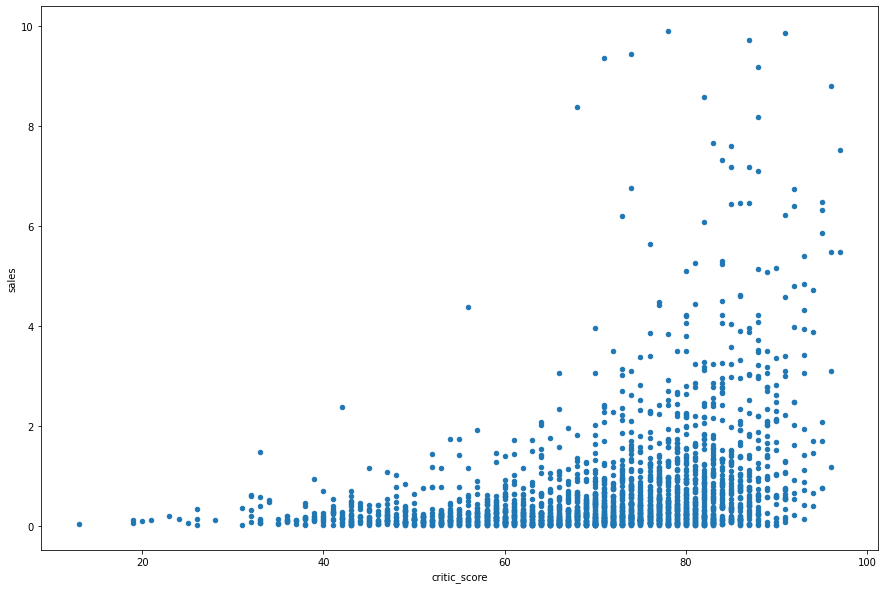

In [66]:
dfcscore=dff2010[dff2010['critic_score']!=0]
dfcscore=dfcscore[dfcscore['sales']<10]
dfcscore.plot.scatter(x='critic_score', y='sales',figsize=[15,10])

parece sim haver relação entre a nota da crítica/publico e as vendas, entretanto parece ser mais uma relação no sentido de que: para se destacar em vendas é muito bom ter critica positiva. Por outro lado há muitos jogos com critica positiva com vendas baixas

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

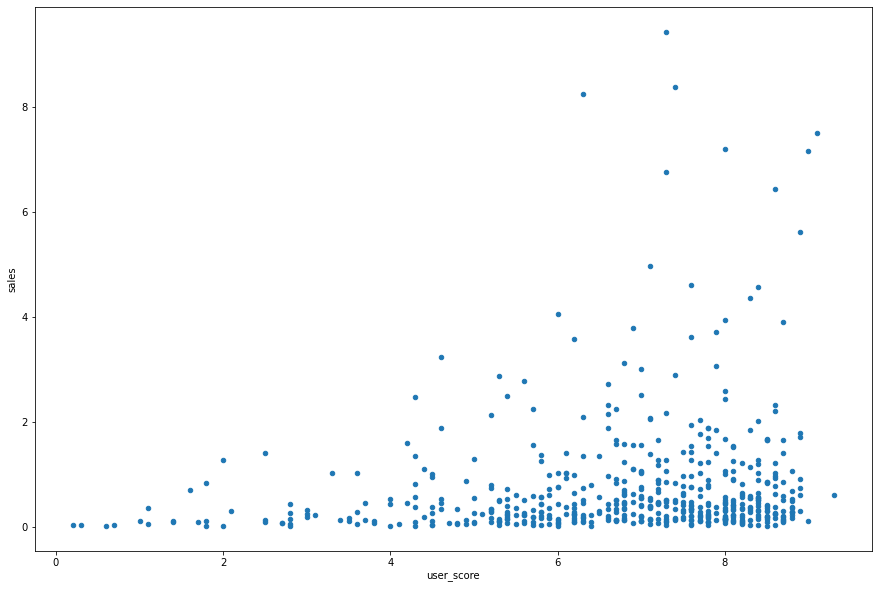

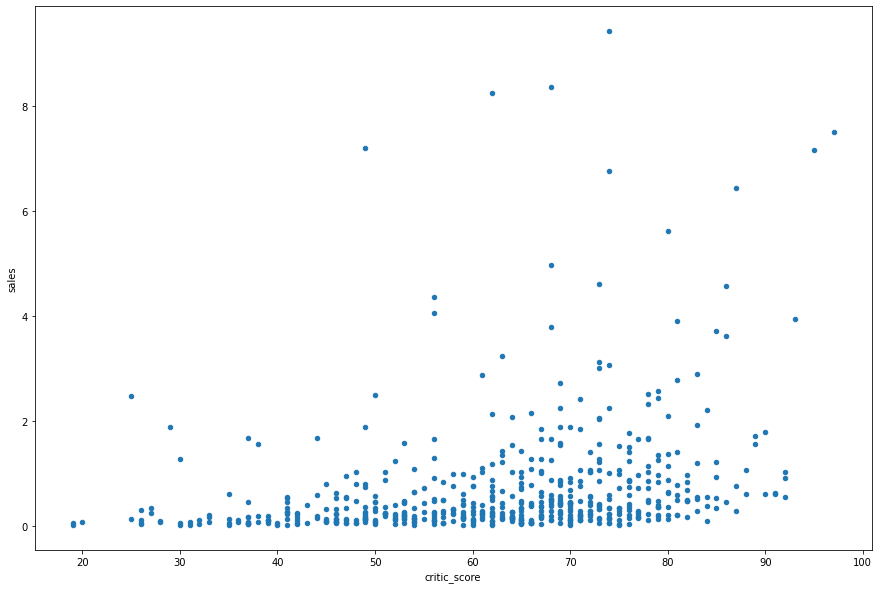

In [67]:
dfwii=dfgames[dfgames['platform']=='Wii']
dfwiiscore=dfwii[dfwii['critic_score']!=0]
dfwiiscore=dfwiiscore[dfwiiscore['sales']<10]
dfwiiuscore=dfwii[dfwii['user_score']!=0]
dfwiiuscore=dfwiiuscore[dfwiiuscore['sales']<10]
dfwiiuscore.plot.scatter(x='user_score', y='sales',figsize=[15,10])
dfwiiscore.plot.scatter(x='critic_score', y='sales',figsize=[15,10])

para o wii, entretanto a relação parece ter muito pouca linearidade, 
mas ainda é perceptível alguma relação de que os mais bem avaliados foram os mais vendidos

<AxesSubplot:xlabel='critic_score', ylabel='sales'>

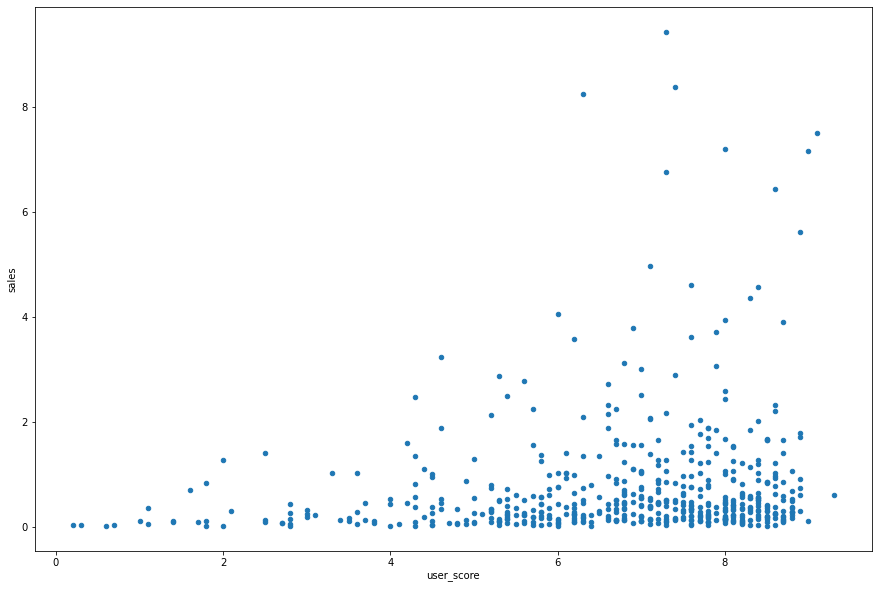

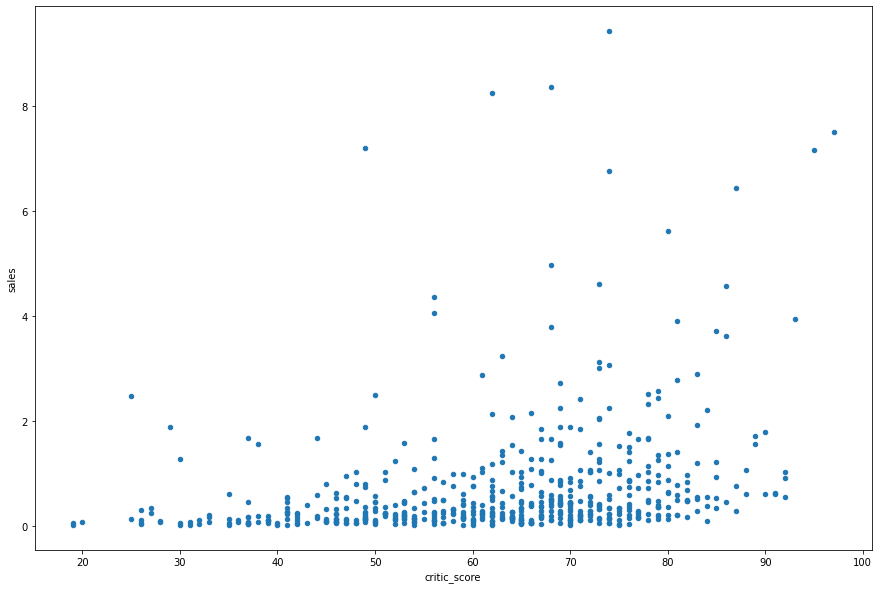

In [68]:
dfwii=dfgames[dfgames['platform']=='Wii']
dfwiiscore=dfwii[dfwii['critic_score']!=0]
dfwiiscore=dfwiiscore[dfwiiscore['sales']<10]
dfwiiuscore=dfwii[dfwii['user_score']!=0]
dfwiiuscore=dfwiiuscore[dfwiiuscore['sales']<10]
dfwiiuscore.plot.scatter(x='user_score', y='sales',figsize=[15,10])
dfwiiscore.plot.scatter(x='critic_score', y='sales',figsize=[15,10])

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

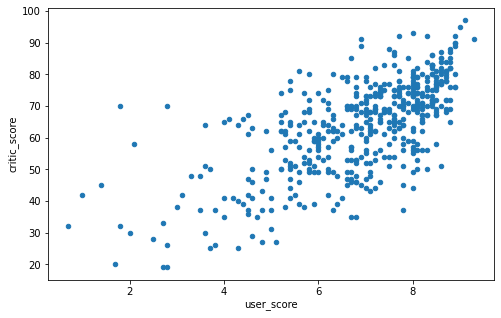

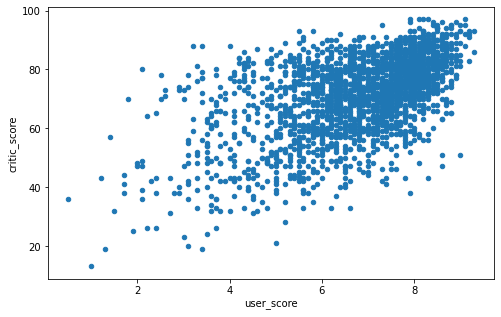

In [69]:
dfwiiuscore=dfwiiuscore[dfwiiuscore['critic_score']!= 0]
dfwiiuscore.plot.scatter(x='user_score', y='critic_score',figsize=[8,5])
dfcscore=dff2010[dff2010['critic_score']!=0]
dfcscore=dfcscore[dfcscore['user_score']!=0]
dfcscore.plot.scatter(x='user_score', y='critic_score',figsize=[8,5])


o público e a critica geralmente concordam entre si em uma relação bem linear.

In [70]:
dff2010['name'].value_counts().sort_values(ascending= False).head(25)

LEGO Marvel Super Heroes                         9
FIFA 14                                          9
Terraria                                         8
FIFA Soccer 13                                   8
The LEGO Movie Videogame                         8
Angry Birds Star Wars                            8
FIFA 15                                          8
LEGO The Hobbit                                  8
Lego Batman 3: Beyond Gotham                     8
LEGO Jurassic World                              8
LEGO Pirates of the Caribbean: The Video Game    7
FIFA Soccer 11                                   7
Lego Star Wars: The Force Awakens                7
Pro Evolution Soccer 2012                        7
FIFA 12                                          7
LEGO The Lord of the Rings                       7
Skylanders: SuperChargers                        7
The Amazing Spider-Man 2 (2014)                  7
LEGO Star Wars III: The Clone Wars               7
Major League Baseball 2K11     

In [71]:

listajogos=['FIFA 14 ',                                         
'LEGO Marvel Super Heroes',                       
'Terraria',                                         
'LEGO The Hobbit',                                  
'FIFA 15',                                          
'FIFA Soccer 13']
comp=dff2010[dff2010['name'].isin(listajogos)].sort_values(by='name')
comp

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
4279,FIFA 15,3DS,2014,Sports,0.09,0.34,0.00,0.03,0.0,2.4,1,0.46,2014
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,1,6.08,2014
6097,FIFA 15,PC,2014,Sports,0.00,0.27,0.00,0.02,82.0,4.2,1,0.29,2014
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0.0,4.5,1,4.28,2014
494,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,0.0,4.2,1,2.92,2014
754,FIFA 15,XOne,2014,Sports,0.60,1.42,0.00,0.16,82.0,5.4,1,2.18,2014
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.00,0.04,0.0,4.3,1,0.56,2014
3381,FIFA 15,PSV,2014,Sports,0.08,0.35,0.05,0.12,0.0,3.1,1,0.60,2014
6028,FIFA Soccer 13,3DS,2012,Action,0.06,0.20,0.00,0.03,68.0,3.7,1,0.29,2012
5300,FIFA Soccer 13,PSP,2012,Action,0.05,0.18,0.02,0.09,0.0,3.2,1,0.34,2012


<AxesSubplot:xlabel='name'>

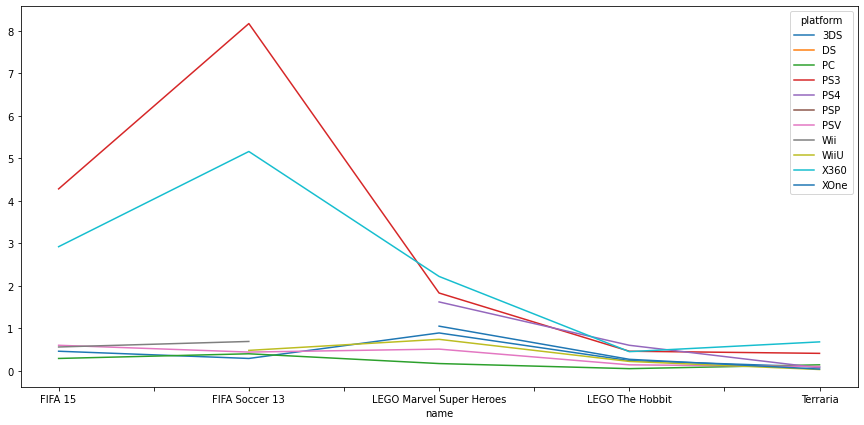

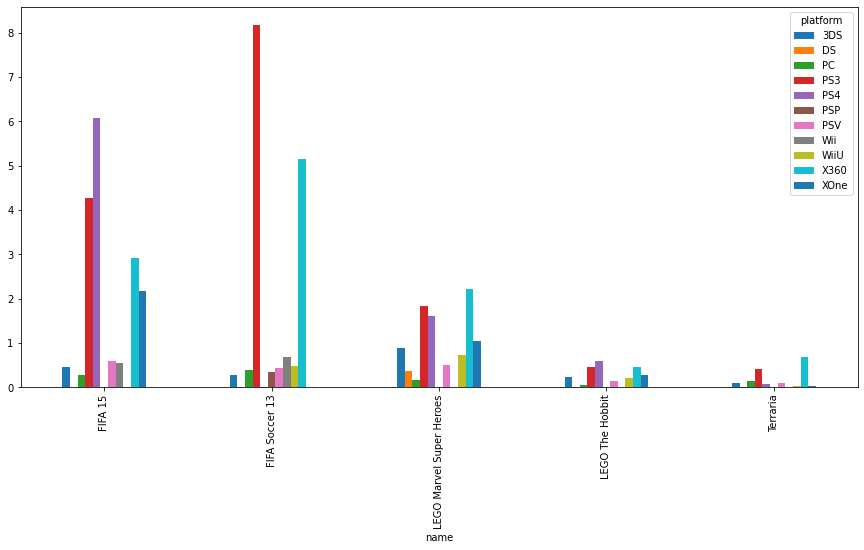

In [72]:
comp= comp[['name','platform','sales']]
compp=comp.pivot_table(index='name', columns= 'platform', values='sales', aggfunc='sum')
compp.plot(figsize=[15,7])
compp.plot(kind='bar',figsize=[15,7])


desses 5 jogos, percebe-se uma acentuada vantagem de vendas pela plataforma do ps4,ps3 e xbox360

In [73]:
genero=dff2010.pivot_table(index='genre', values='sales', aggfunc='mean')
genero.sort_values(by='sales', ascending= False)

,sales
genre,
Shooter,1.147838
Platform,0.780519
Sports,0.566250
Role-Playing,0.551571
Racing,0.506829
Action,0.450099
Misc,0.408957
Fighting,0.408650
Simulation,0.324286


In [74]:
genero2=dff2010.pivot_table(index='genre', values='sales', aggfunc='sum')
genero2.sort_values(by='sales', ascending= False)

,sales
genre,
Action,681.00
Shooter,483.24
Sports,330.69
Role-Playing,316.05
Misc,239.24
Racing,124.68
Platform,120.20
Fighting,81.73
Simulation,72.64


tem-se muitas vendas de jogos de ação, esportes e de tiro, 
entretanto se formos verificar a média por jogo, os de plataforma e de tiro ganham mais destaque.
tem-se muito mais jogos de ação sendo fabricados, mas em média os que vendem melhor são os de tiro.
os de RPG e de corrida também conseguem boas vendas.

In [75]:
dff2005.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
year_of_release,1.000000,-0.035385,0.025244,0.004763,-0.006972,-0.102732,-0.058653,0.006784,-0.008180,1.000000
na_sales,-0.035385,1.000000,0.853967,0.433859,0.824645,0.224417,0.197513,0.109316,0.954316,-0.035385
eu_sales,0.025244,0.853967,1.000000,0.479683,0.879509,0.196319,0.168212,0.088993,0.949468,0.025244
jp_sales,0.004763,0.433859,0.479683,1.000000,0.410954,0.031385,0.036543,-0.052241,0.591069,0.004763
other_sales,-0.006972,0.824645,0.879509,0.410954,1.000000,0.215010,0.194459,0.114362,0.895335,-0.006972
critic_score,-0.102732,0.224417,0.196319,0.031385,0.215010,1.000000,0.816103,0.607942,0.208597,-0.102732
user_score,-0.058653,0.197513,0.168212,0.036543,0.194459,0.816103,1.000000,0.634527,0.184025,-0.058653
rating,0.006784,0.109316,0.088993,-0.052241,0.114362,0.607942,0.634527,1.000000,0.089395,0.006784
sales,-0.008180,0.954316,0.949468,0.591069,0.895335,0.208597,0.184025,0.089395,1.000000,-0.008180
year,1.000000,-0.035385,0.025244,0.004763,-0.006972,-0.102732,-0.058653,0.006784,-0.008180,1.000000


In [76]:
dff2005=dff2005[dff2005['critic_score']!=0]
dff2005=dff2005[dff2005['user_score']!=0]
dff2005.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,year
year_of_release,1.000000,-0.022710,0.046878,-0.021214,0.009140,0.097584,-0.145985,0.093442,0.003592,1.000000
na_sales,-0.022710,1.000000,0.859625,0.489468,0.838502,0.217254,0.072733,-0.025498,0.959094,-0.022710
eu_sales,0.046878,0.859625,1.000000,0.553003,0.889982,0.214230,0.052761,-0.025120,0.954507,0.046878
jp_sales,-0.021214,0.489468,0.553003,1.000000,0.490912,0.124756,0.121694,-0.085417,0.629829,-0.021214
other_sales,0.009140,0.838502,0.889982,0.490912,1.000000,0.231288,0.071642,-0.008628,0.909300,0.009140
critic_score,0.097584,0.217254,0.214230,0.124756,0.231288,1.000000,0.566694,0.038715,0.226270,0.097584
user_score,-0.145985,0.072733,0.052761,0.121694,0.071642,0.566694,1.000000,0.074587,0.079333,-0.145985
rating,0.093442,-0.025498,-0.025120,-0.085417,-0.008628,0.038715,0.074587,1.000000,-0.034126,0.093442
sales,0.003592,0.959094,0.954507,0.629829,0.909300,0.226270,0.079333,-0.034126,1.000000,0.003592
year,1.000000,-0.022710,0.046878,-0.021214,0.009140,0.097584,-0.145985,0.093442,0.003592,1.000000


<AxesSubplot:title={'center':'vendas ot'}, xlabel='year_of_release'>

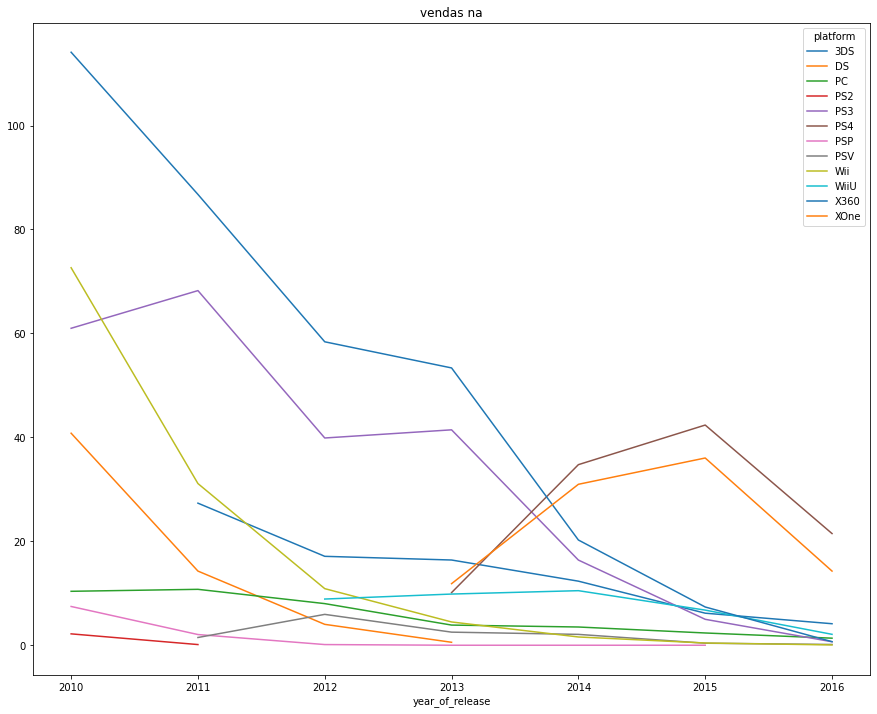

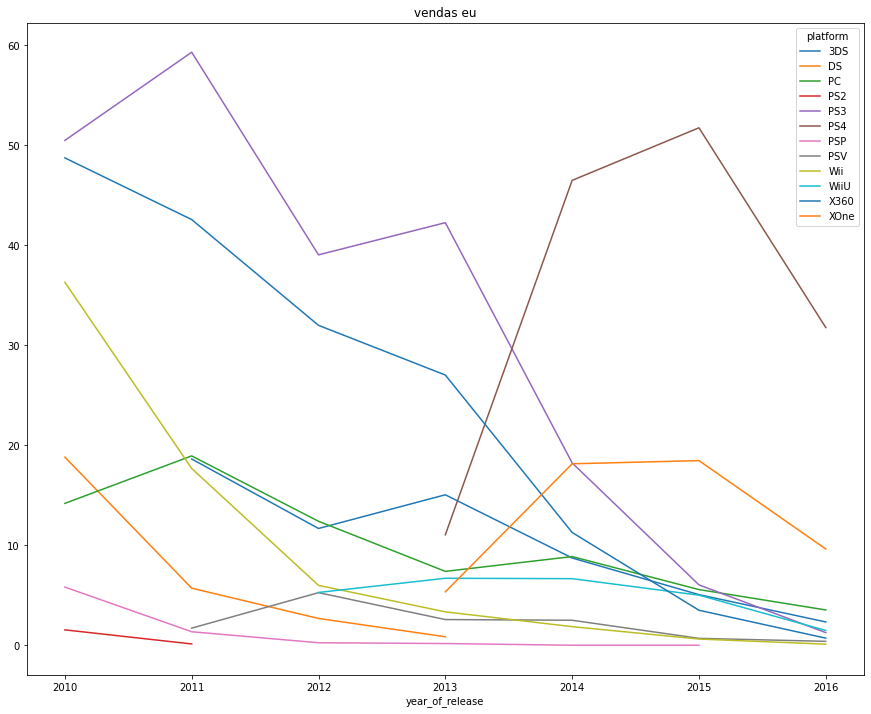

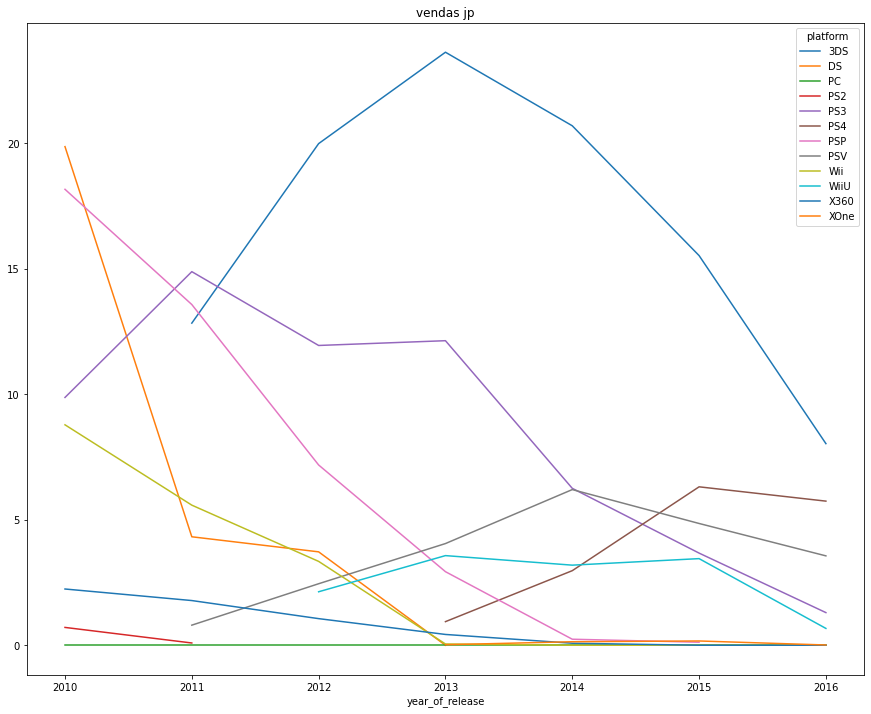

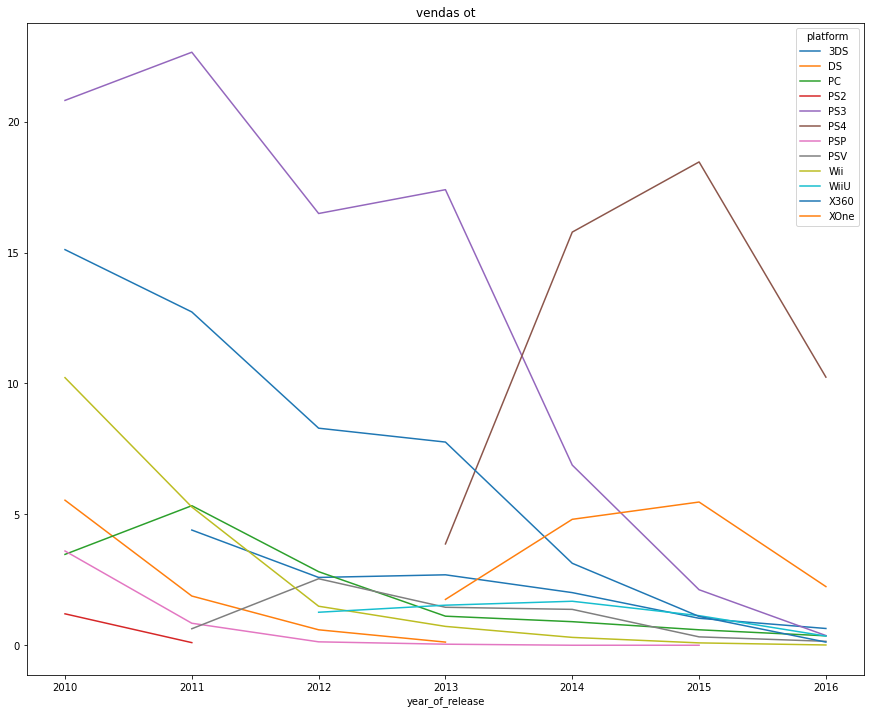

In [77]:
df2010na=dff2010.pivot_table(index='year_of_release',columns='platform',values='na_sales', aggfunc= 'sum' )
df2010eu=dff2010.pivot_table(index='year_of_release',columns='platform',values='eu_sales', aggfunc= 'sum' )
df2010jp=dff2010.pivot_table(index='year_of_release',columns='platform',values='jp_sales', aggfunc= 'sum' )
df2010ot=dff2010.pivot_table(index='year_of_release',columns='platform',values='other_sales', aggfunc= 'sum' )

df2010na.plot(figsize=[15,12], title= 'vendas na')
df2010eu.plot(figsize=[15,12], title= 'vendas eu')
df2010jp.plot(figsize=[15,12], title= 'vendas jp')
df2010ot.plot(figsize=[15,12], title= 'vendas ot')


In [78]:
print("Na\n",
      df2010na.sum().sort_values(ascending=False).head(5),
      "\nEu\n",
      df2010eu.sum().sort_values(ascending=False).head(5),
      "\nJp\n",
      df2010jp.sum().sort_values(ascending=False).head(5),
      "\nOt\n",
      df2010ot.sum().sort_values(ascending=False).head(5))

Na
 platform
X360    340.91
PS3     232.61
Wii     121.20
PS4     108.74
XOne     93.12
dtype: float64 
Eu
 platform
PS3     216.68
X360    165.85
PS4     141.09
PC       70.89
Wii      65.91
dtype: float64 
Jp
 platform
3DS    100.67
PS3     60.04
PSP     42.20
DS      27.90
PSV     21.91
dtype: float64 
Ot
 platform
PS3     86.72
PS4     48.35
X360    48.24
Wii     18.11
PC      14.57
dtype: float64


No japão, o portatil 3ds da japonesa  Nintendo tem ampla liderança de mercado.
Já na america do norte, a empresa americana Microsoft teve maior fatia do mercado com seu xbox360 e xbox one.
Enquanto isso, na europa, e no resto do mundo, a sony com o Playstation3 e playstation4 alcançam as melhores vendas.

In [79]:
genero2=dff2010.pivot_table(index='genre', values='sales', aggfunc='sum')
genero2.sort_values(by='sales', ascending= False)

,sales
genre,
Action,681.00
Shooter,483.24
Sports,330.69
Role-Playing,316.05
Misc,239.24
Racing,124.68
Platform,120.20
Fighting,81.73
Simulation,72.64


In [80]:
generoeu=dff2010.pivot_table(index='genre', values='eu_sales', aggfunc='mean').sort_values(by='eu_sales', ascending=False)
generona=dff2010.pivot_table(index='genre', values='na_sales', aggfunc='mean').sort_values(by='na_sales', ascending=False)
generojp=dff2010.pivot_table(index='genre', values='jp_sales', aggfunc='mean').sort_values(by='jp_sales', ascending=False)
generoot=dff2010.pivot_table(index='genre', values='other_sales', aggfunc='mean').sort_values(by='other_sales', ascending=False)
genero=dff2010.pivot_table(index='genre', values='sales', aggfunc='mean')

print("eu",generoeu.head(5),
      "na",generona.head(5),
      "jp",generojp.head(5),
      "ot",generoot.head(5))

eu           eu_sales
genre             
Shooter   0.410475
Platform  0.251818
Racing    0.226951
Sports    0.201216
Action    0.156378 na               na_sales
genre                 
Shooter       0.568029
Platform      0.356494
Sports        0.270822
Misc          0.217368
Role-Playing  0.196178 jp               jp_sales
genre                 
Role-Playing  0.180977
Platform      0.102662
Fighting      0.069500
Simulation    0.059643
Action        0.048143 ot           other_sales
genre                
Shooter      0.135843
Platform     0.069545
Sports       0.067603
Racing       0.062805
Action       0.051223


como esperado no jpão se vende mais rpg, depois plataforma e pescaria, 
na america do norte tiro plataforma e esportes, 
na europa tiro também, assim com plataforma, mas corrida é mais popular que esportes. 

<AxesSubplot:title={'center':'Ot'}, xlabel='rating', ylabel='other_sales'>

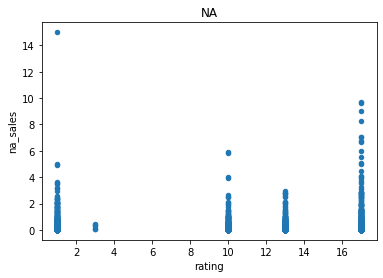

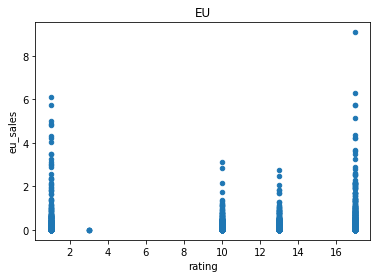

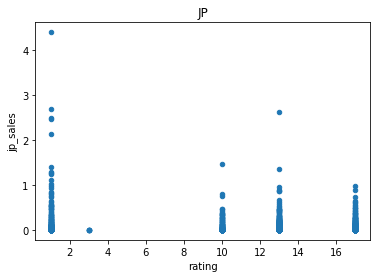

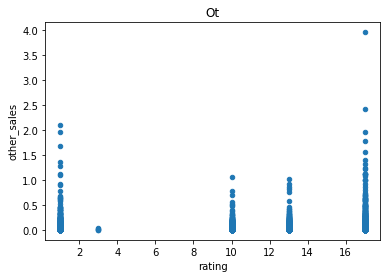

In [81]:
dff2010=dff2010[dff2010['rating']!=0]
dff2010.plot.scatter(x='rating',y='na_sales', title='NA')
dff2010.plot.scatter(x='rating',y='eu_sales',title='EU')
dff2010.plot.scatter(x='rating',y='jp_sales',title='JP')
dff2010.plot.scatter(x='rating',y='other_sales',title='Ot')

japoneses gostam mais de jogos de classificação livre(everyone) enquanto europeus e norte americanos gostam mais de jogos para publico maduros. 

testando hipoteses:
     As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?

In [82]:
dff2010['platform'].value_counts()

PS3     610
X360    569
PC      371
Wii     327
DS      268
PS4     255
3DS     228
XOne    186
PSV     151
WiiU    105
PSP      83
PS2      19
Name: platform, dtype: int64

In [83]:
dff2010=dff2010[dff2010['user_score']!= 0]

In [84]:
df2010=dfgames[dfgames['year_of_release']>=2010]
xboxone= df2010[df2010['platform']=='XOne']
xboxone=xboxone[xboxone['user_score']!=0]
#tirando os valores ausente
xbox_userscore=xboxone['user_score'].reset_index(drop=True)
xbox_userscore
pc= df2010[df2010['platform']=='PC']
pc=pc[pc['user_score']!=0]
pc_userscore=pc['user_score'].reset_index(drop=True)
pc_userscore

0      4.0
1      8.2
2      8.1
3      3.9
4      5.9
      ... 
384    1.4
385    7.9
386    7.6
387    5.8
388    7.2
Name: user_score, Length: 389, dtype: float64

In [85]:
print("média das avaliação de usuarios para jogos do PC : ", pc_userscore.mean().round(3))
print("média das avaliação de usuarios para jogos do xboxone ", xbox_userscore.mean().round(3))

média das avaliação de usuarios para jogos do PC :  6.532
média das avaliação de usuarios para jogos do xboxone  6.521


me pergunto se são amostras dependentes ou independentes, pois alguns jogos são os mesmos para ambas plataformas. Ainda assim, opto por considerar amostras independentes.

In [86]:
results=st.ttest_ind(xbox_userscore, pc_userscore)
alpha=0.5
print('p-value: ', results.pvalue) 
if results.pvalue < alpha: 
  print("Rejeitamos a hipótese nula de que 'as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas''") 
else: 
  print("Nós não podemos rejeitar a hipótese nula, podem sim ser as mesmas classificações") 

p-value:  0.9354017046033495
Nós não podemos rejeitar a hipótese nula, podem sim ser as mesmas classificações


— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes?


In [87]:
df2010.columns
df2010['genre'].value_counts()

Action          1513
Misc             585
Sports           584
Role-Playing     573
Adventure        566
Shooter          421
Racing           246
Simulation       224
Fighting         200
Strategy         176
Platform         154
Puzzle           116
Name: genre, dtype: int64

In [88]:
acao= df2010[df2010['genre']=='Action']
acao=acao[acao['user_score']!=0]
#tirando os valores ausente
acao2=acao['user_score'].reset_index(drop=True)
acao2
esportes= df2010[df2010['genre']=='Sports']
esportes=esportes[esportes['user_score']!=0]
esportes2=esportes['user_score'].reset_index(drop=True)
esportes2

0      4.3
1      5.0
2      4.3
3      7.4
4      5.7
      ... 
314    6.9
315    5.5
316    4.5
317    1.4
318    6.6
Name: user_score, Length: 319, dtype: float64

<AxesSubplot:>

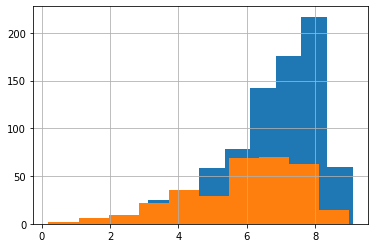

In [89]:
acao2.hist()
esportes2.hist()

In [90]:
results=st.ttest_ind(esportes2, acao2)
alpha=0.5
print('p-value: ', results.pvalue) 
if results.pvalue < alpha: 
  print("Rejeitamos a hipótese nula de que 'As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas''") 
else: 
  print("Nós não podemos rejeitar a hipótese nula, pode acabar sendo as mesmas classificações") 

p-value:  5.205675773544115e-19
Rejeitamos a hipótese nula de que 'As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são as mesmas''


Observações, utilizei dados apenas de 2010 por serem mais relevantes, recentes e contarem com mais avaliações, comparei o conjunto de todas as notas de cada categoria(plataforma Xbox One x PC e genero ação x esportes).
usei como hipotese nula não fazer diferença se é de uma plataforma ou outra, ou se é de um genero ou outro.
usei scipy.stats.ttest_ind(conjunto1, conjunto2) para que o proprio pandas compare os conjuntos e me diga a probabilidade de em duas distribuições aleatórias com iguais probabilidades, a diferença entre ambas ser semelhante a encontrada nos dados.
usei como critério que se a chance for abaixo de 5% então a hipotese núla será rejeitada por ser muito improvável.

Conclusão geral:

As plataformas após o lançamento vendem muitos jogos e os jogos tem boas médias de vendas, isso melhora, em geral no ano seguinte e no ano após, entretanto as medias vam caindo com o tempo. nenhuma plataforma consegue se manter bem no mercado por mais de 10 anos, algumas plataformas são devoradas pelos concorrentes antes disso(ex.: nintendo 64, que concorreu com ps1 e pouco tempo depois com o ps2).
o genero importa muito para as avaliações du público, mas a plataforma nem tanto.
as regiões diferentes também tem gosotos diferentes para genero favorito e classificação etaria dos jogos favorito(mais vendidos).